In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import datatable as dt

from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, cross_validate
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, make_scorer, roc_auc_score,accuracy_score, roc_curve
from scipy.stats import ks_2samp
from treeinterpreter import treeinterpreter as ti
from sklearn import metrics
from sklearn.model_selection import train_test_split

import h2o
from h2o.automl import *

In [2]:
path = '/Users/andy42i/Documents/Documentos/Python/case_study_data/'
data01 = pd.read_csv(path + 'data01.csv', sep =',', header = 0)
data02 = pd.read_csv(path + 'data02.csv', sep =',', header = 0)
data03 = pd.read_csv(path + 'data03.csv', sep =',', header = 0)
data04 = pd.read_csv(path + 'data04.csv', sep =',', header = 0)

In [3]:
data01.head(5)

,DebtID,ConsumerID,LoanAge,InterestRate,NumberMonthsInArrears,CurrentBalance,EstDisposableIncome,ArrearsBalance,TotalExposure,IndexedTotalIncome,OriginalBalance,MaturityDate,LoanOriginationDate,PropertyRegion,ReportDate,ConsumerAge,OriginalPropertyValue,PropertyIndexFactor,ForeclosureValue
0,2162571,353223,13,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2009-07-31,29,150006.818492,0.958562,135002.45459
1,2162571,353223,14,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2009-08-31,29,150006.818492,0.945827,135002.45459
2,2162571,353223,19,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2010-01-31,30,150006.818492,0.928933,135002.45459
3,2162571,353223,23,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2010-05-31,30,150006.818492,0.939887,135002.45459
4,2162571,353223,28,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2010-10-31,30,150006.818492,0.940731,135002.45459


In [4]:
data01.dtypes

DebtID                     int64
ConsumerID                 int64
LoanAge                    int64
InterestRate             float64
NumberMonthsInArrears    float64
CurrentBalance           float64
EstDisposableIncome      float64
ArrearsBalance           float64
TotalExposure            float64
IndexedTotalIncome       float64
OriginalBalance          float64
MaturityDate              object
LoanOriginationDate       object
PropertyRegion            object
ReportDate                object
ConsumerAge                int64
OriginalPropertyValue    float64
PropertyIndexFactor      float64
ForeclosureValue         float64
dtype: object

In [5]:
data02.dtypes

DebtID                     int64
ConsumerID                 int64
LoanAge                    int64
InterestRate             float64
NumberMonthsInArrears    float64
CurrentBalance           float64
EstDisposableIncome      float64
ArrearsBalance           float64
TotalExposure            float64
IndexedTotalIncome       float64
OriginalBalance          float64
MaturityDate              object
LoanOriginationDate       object
PropertyRegion            object
ReportDate                object
ConsumerAge                int64
OriginalPropertyValue    float64
PropertyIndexFactor      float64
ForeclosureValue         float64
dtype: object

In [6]:
data03.dtypes

DebtID                     int64
ConsumerID                 int64
LoanAge                    int64
InterestRate             float64
NumberMonthsInArrears    float64
CurrentBalance           float64
EstDisposableIncome      float64
ArrearsBalance           float64
TotalExposure            float64
IndexedTotalIncome       float64
OriginalBalance          float64
MaturityDate              object
LoanOriginationDate       object
PropertyRegion            object
ReportDate                object
ConsumerAge                int64
OriginalPropertyValue    float64
PropertyIndexFactor      float64
ForeclosureValue         float64
dtype: object

In [7]:
data04.dtypes

DebtID                   float64
ConsumerID                 int64
LoanAge                    int64
InterestRate             float64
NumberMonthsInArrears    float64
CurrentBalance           float64
EstDisposableIncome      float64
ArrearsBalance           float64
TotalExposure            float64
IndexedTotalIncome       float64
OriginalBalance          float64
MaturityDate              object
LoanOriginationDate       object
PropertyRegion            object
ReportDate                object
ConsumerAge                int64
OriginalPropertyValue    float64
PropertyIndexFactor      float64
ForeclosureValue         float64
dtype: object

### Data type are different
### We need to convert dates from object to data type

In [8]:
data01['MaturityDate'] = data01['MaturityDate'].astype('datetime64')
data01['LoanOriginationDate'] = data01['LoanOriginationDate'].astype('datetime64')
data01['ReportDate'] = data01['ReportDate'].astype('datetime64')

data02['MaturityDate'] = data02['MaturityDate'].astype('datetime64')
data02['LoanOriginationDate'] = data02['LoanOriginationDate'].astype('datetime64')
data02['ReportDate'] = data02['ReportDate'].astype('datetime64')

data03['MaturityDate'] = data03['MaturityDate'].astype('datetime64')
data03['LoanOriginationDate'] = data03['LoanOriginationDate'].astype('datetime64')
data03['ReportDate'] = data03['ReportDate'].astype('datetime64')

data04['MaturityDate'] = data04['MaturityDate'].astype('datetime64')
data04['LoanOriginationDate'] = data04['LoanOriginationDate'].astype('datetime64')
data04['ReportDate'] = data04['ReportDate'].astype('datetime64')
data04['DebtID'] = data04['DebtID'].astype(int)

In [9]:
data = data01.append([data02, data03,data04])
data.shape

(415229, 19)

In [11]:
df_agg = data.groupby([
    'DebtID',
    'ConsumerID', 
    'PropertyRegion',
    'MaturityDate',
    'LoanOriginationDate',
    
]).agg(
    {'ConsumerAge':[min,max],
    'InterestRate': max,
     'NumberMonthsInArrears' : max,
     'CurrentBalance' : max,
     'EstDisposableIncome': max,
     'ArrearsBalance': max,
     'TotalExposure': max,
     'OriginalBalance': max,
     'OriginalPropertyValue': max,   
     'ForeclosureValue': max,
     'ReportDate': max
    }).reset_index()

df_agg.columns =  df_agg.columns.droplevel(1)

In [12]:
cols = ['DebtID', 'ConsumerID', 'PropertyRegion', 'MaturityDate','LoanOriginationDate',
       'StartConsumerAge','CurrentConsumerAge','InterestRate','NumberMonthsInArrears',
     'CurrentBalance','EstDisposableIncome','ArrearsBalance','TotalExposure','OriginalBalance',
        'OriginalPropertyValue','ForeclosureValue','ReportDate']

df_agg.columns = cols
df_agg.head(5)

,DebtID,ConsumerID,PropertyRegion,MaturityDate,LoanOriginationDate,StartConsumerAge,CurrentConsumerAge,InterestRate,NumberMonthsInArrears,CurrentBalance,EstDisposableIncome,ArrearsBalance,TotalExposure,OriginalBalance,OriginalPropertyValue,ForeclosureValue,ReportDate
0,2159011,352580,ZL,2038-06-01,2008-05-27,29,31,5.40,NaN,179200.0,924.0,NaN,258000.0,179200.0,245009.600000,208009.300000,2012-04-30
1,2162571,353223,NH,2038-07-01,2008-06-11,28,32,5.55,NaN,110000.0,907.0,NaN,110000.0,110000.0,150006.818492,135002.500000,2012-04-30
2,2163721,353406,GL,2038-07-01,2008-06-13,28,32,5.80,NaN,197000.0,688.0,NaN,209000.0,197000.0,176270.600000,158360.100000,2012-04-30
3,2163722,353406,GL,2038-07-01,2008-06-13,28,32,5.60,NaN,12000.0,688.0,NaN,209000.0,12000.0,10737.294202,9646.302251,2012-04-30
4,2170131,354477,GL,2038-07-01,2008-06-23,26,30,5.80,NaN,183700.0,-75.0,NaN,183700.0,183700.0,167502.507523,149995.917368,2012-04-30


In [13]:
from datetime import datetime

def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

df_agg['MaturityDate'] = pd.to_datetime(df_agg['MaturityDate'])
df_agg['LoanOriginationDate'] = pd.to_datetime(df_agg['LoanOriginationDate'])

df_agg['Term'] = (df_agg['MaturityDate'].apply(lambda x: x.year) - df_agg['LoanOriginationDate'].apply(lambda x: x.year))*12 +  (df_agg['MaturityDate'].apply(lambda x: x.month) - df_agg['LoanOriginationDate'].apply(lambda x: x.month))

In [14]:
df_agg['ReportDate'] = pd.to_datetime(df_agg['ReportDate'])
df_agg['LoanOriginationDate'] = pd.to_datetime(df_agg['LoanOriginationDate'])

df_agg['preTime'] = (df_agg['ReportDate'].apply(lambda x: x.year) - df_agg['LoanOriginationDate'].apply(lambda x: x.year))*12 +  (df_agg['ReportDate'].apply(lambda x: x.month) - df_agg['LoanOriginationDate'].apply(lambda x: x.month))

In [15]:
df_agg['postTime'] = (df_agg['MaturityDate'].apply(lambda x: x.year) - df_agg['ReportDate'].apply(lambda x: x.year))*12 +  (df_agg['MaturityDate'].apply(lambda x: x.month) - df_agg['ReportDate'].apply(lambda x: x.month))

In [16]:
df_agg['Year'] = df_agg['LoanOriginationDate'].apply(lambda x: x.year)
df_agg['Month'] = df_agg['LoanOriginationDate'].apply(lambda x: x.month)

In [17]:
df_agg.describe()

,DebtID,ConsumerID,StartConsumerAge,CurrentConsumerAge,InterestRate,NumberMonthsInArrears,CurrentBalance,EstDisposableIncome,ArrearsBalance,TotalExposure,OriginalBalance,OriginalPropertyValue,ForeclosureValue,Term,preTime,postTime,Year,Month
count,8.531000e+03,8.531000e+03,8531.000000,8531.000000,8531.000000,1968.000000,8.531000e+03,8461.000000,1968.000000,8.531000e+03,8.531000e+03,8.531000e+03,8.462000e+03,8531.000000,8531.000000,8531.000000,8531.000000,8531.000000
mean,9.747715e+08,2.475923e+06,37.459852,41.523620,4.714942,4.799949,1.005233e+05,1187.467557,1990.759964,2.668770e+05,1.015640e+05,1.082118e+05,9.843280e+04,328.721252,51.968468,276.752784,2007.801313,6.416364
std,2.066414e+08,4.994270e+05,9.309244,9.175634,0.615818,63.241681,7.490089e+04,1523.027436,8427.688037,1.375190e+05,7.486989e+04,9.165087e+04,8.402608e+04,69.476002,27.173160,63.581877,2.379135,3.472030
min,2.159011e+06,1.291600e+04,19.000000,22.000000,2.750000,0.000000,0.000000e+00,-15412.000000,0.000000,0.000000e+00,4.000000e+02,5.370045e+02,2.935779e+00,13.000000,-1.000000,-42.000000,2003.000000,1.000000
25%,8.089251e+08,2.150619e+06,30.000000,35.000000,4.300000,0.500000,5.453900e+04,233.000000,430.815000,1.805000e+05,5.570200e+04,5.809796e+04,5.234525e+04,315.000000,30.000000,269.000000,2006.000000,3.000000
50%,9.935521e+08,2.484301e+06,37.000000,41.000000,4.750000,1.000000,9.200000e+04,1120.000000,804.100000,2.370000e+05,9.300000e+04,9.270093e+04,8.361348e+04,361.000000,55.000000,289.000000,2008.000000,6.000000
75%,1.171397e+09,2.936403e+06,43.000000,47.000000,5.100000,1.000000,1.300000e+05,1887.000000,1211.620000,3.070000e+05,1.300000e+05,1.333333e+05,1.215005e+05,361.000000,72.000000,314.000000,2010.000000,9.000000
max,1.288829e+09,3.171655e+06,80.000000,82.000000,7.350000,1758.700000,1.400000e+06,14193.000000,124230.620000,1.833800e+06,1.400000e+06,1.564945e+06,1.484943e+06,361.000000,122.000000,361.000000,2013.000000,12.000000


## Check data distribution

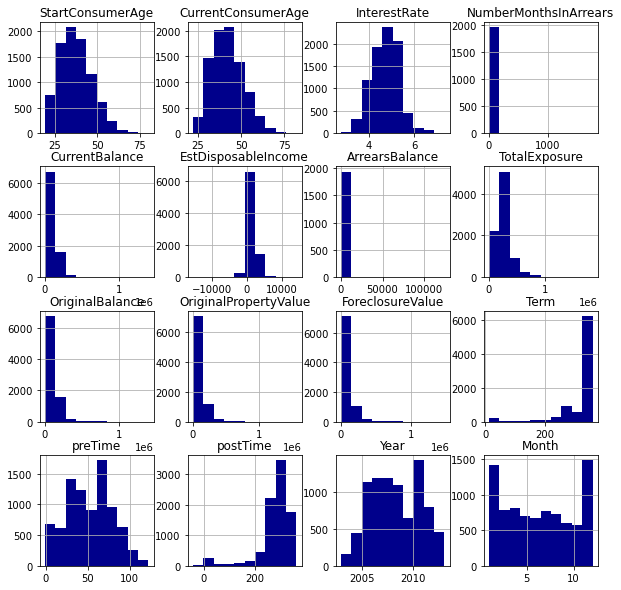

In [18]:
df_agg.iloc[:,2:df_agg.shape[1]].hist(color='DarkBlue',figsize=(10,10));

## Check missing values

In [19]:
df_agg.isna().sum()

DebtID                      0
ConsumerID                  0
PropertyRegion              0
MaturityDate                0
LoanOriginationDate         0
StartConsumerAge            0
CurrentConsumerAge          0
InterestRate                0
NumberMonthsInArrears    6563
CurrentBalance              0
EstDisposableIncome        70
ArrearsBalance           6563
TotalExposure               0
OriginalBalance             0
OriginalPropertyValue       0
ForeclosureValue           69
ReportDate                  0
Term                        0
preTime                     0
postTime                    0
Year                        0
Month                       0
dtype: int64

In [20]:
#Fill NaN with 0 for NumberMonthsInArrears
df_agg['NumberMonthsInArrears'].fillna(0, inplace=True)
#Fill NaN with 0 for ArrearsBalance
df_agg['ArrearsBalance'].fillna(0, inplace=True)

In [21]:
df_agg['ArrearsBalance'].describe()

count      8531.000000
mean        459.244591
std        4133.019620
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      124230.620000
Name: ArrearsBalance, dtype: float64

In [22]:
df_agg['status'] = df_agg["NumberMonthsInArrears"].apply(lambda x: 'Yes' if x > 0 else 'No')
df_agg['status'].value_counts(normalize=False, dropna=False)

No     6862
Yes    1669
Name: status, dtype: int64

In [23]:
df_agg['status'].value_counts(normalize=True, dropna=False)

No     0.804361
Yes    0.195639
Name: status, dtype: float64

## How many consumers have arrears balance 

In [24]:
arrears = df_agg[df_agg.ArrearsBalance > 0]
len(np.unique(arrears.ConsumerID))

736

In [25]:
monthsarrears = df_agg[df_agg.NumberMonthsInArrears > 0]
len(np.unique(monthsarrears.ConsumerID))

635

## Characteristics of consumer with arrears balance

Text(0.5, 1.0, 'Histogram Property Region')

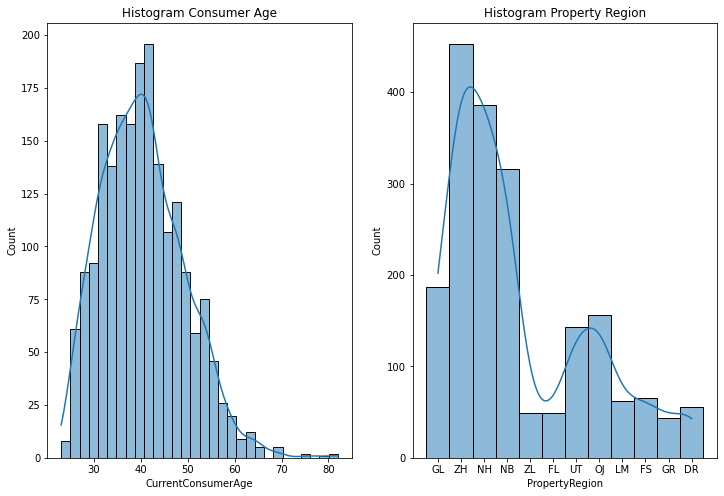

In [26]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.histplot(data = arrears, x=arrears.CurrentConsumerAge, bins=30, kde=True)
plt.title('Histogram Consumer Age')

plt.subplot(1, 2, 2)
sns.histplot(data = arrears, x=arrears.PropertyRegion, bins=30, kde=True)
plt.title('Histogram Property Region')

In [27]:
arrears.CurrentConsumerAge.describe()

count    1965.000000
mean       40.431552
std         8.857955
min        23.000000
25%        34.000000
50%        40.000000
75%        46.000000
max        82.000000
Name: CurrentConsumerAge, dtype: float64

Text(0, 0.5, 'Number of Consumers')

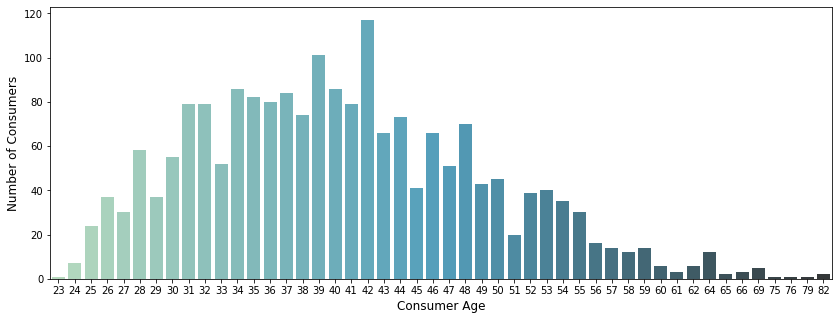

In [28]:
a = arrears.groupby('CurrentConsumerAge')['status'].count().reset_index()
plt.figure(figsize=(14,5))
ax = sns.barplot(x=a['CurrentConsumerAge'],y = a['status'], palette = 'GnBu_d')
plt.xlabel('Consumer Age',fontsize = 12)
plt.ylabel('Number of Consumers',fontsize = 12)

## Characteristics of consumer without arrears balance

Text(0.5, 1.0, 'Histogram Property Region')

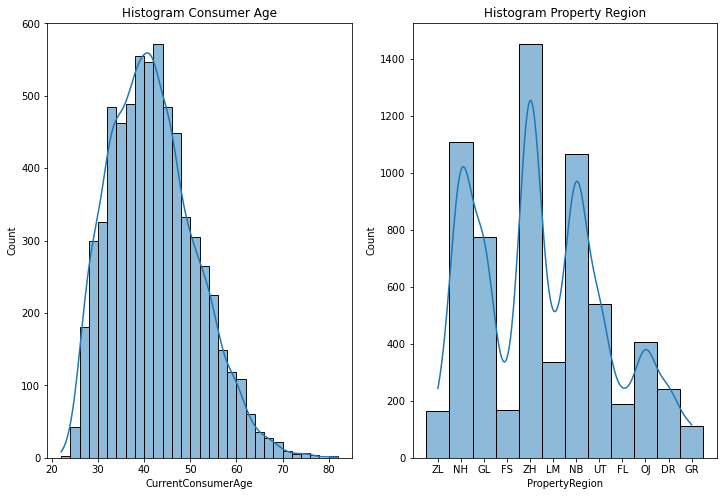

In [29]:
notarrears = df_agg[df_agg.ArrearsBalance == 0]

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.histplot(data = notarrears, x=notarrears.CurrentConsumerAge, bins=30, kde=True)
plt.title('Histogram Consumer Age')

plt.subplot(1, 2, 2)
sns.histplot(data = notarrears, x=notarrears.PropertyRegion, bins=30, kde=True)
plt.title('Histogram Property Region')

In [30]:
notarrears.CurrentConsumerAge.describe()

count    6566.000000
mean       41.850442
std         9.244196
min        22.000000
25%        35.000000
50%        41.000000
75%        48.000000
max        82.000000
Name: CurrentConsumerAge, dtype: float64

Text(0, 0.5, 'Number of Consumers without Arrears')

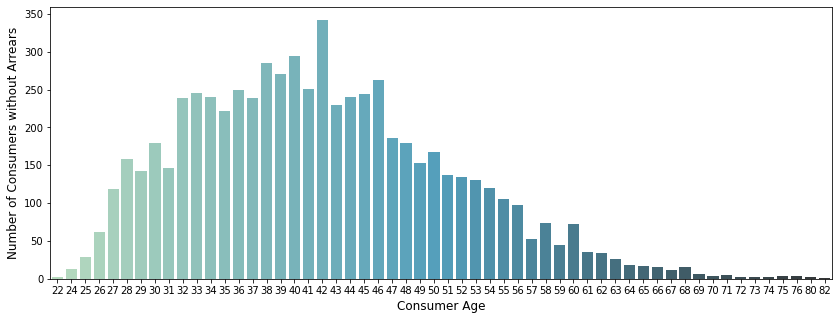

In [31]:
a = notarrears.groupby('CurrentConsumerAge')['status'].count().reset_index()
plt.figure(figsize=(14,5))
ax = sns.barplot(x=a['CurrentConsumerAge'],y = a['status'], palette = 'GnBu_d')
plt.xlabel('Consumer Age',fontsize = 12)
plt.ylabel('Number of Consumers without Arrears',fontsize = 12)

In [32]:
# make general plots to examine each feature
def plot_var(col_name, full_name, continuous):
    
    data = df_agg
   
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(data.loc[data[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(data[col_name], order=sorted(data[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by loan_status
    if continuous:
        sns.boxplot(x=col_name, y='status', data=data, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Status')
    else:
        Charged_Off_rates = data.groupby(col_name)['status'].value_counts(normalize=True)[:,'Yes']
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Delinquent')
        ax2.set_title('Delinquent by ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde plot of the variable gropued by loan_status
    if continuous:  
        facet = sns.FacetGrid(data, hue = 'status', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,4))
        sns.countplot(x=col_name, hue='status', data=data, order=sorted(data[col_name].unique()) )
     
    plt.tight_layout()

## Create Target Value

Y -- Yes if the customer has been deliquent
N -- No otherwise

In [33]:
def describe_pd(df_in,columns, deciles = False):
    if deciles:
        percentiles = np.array(range(0,110,10))
    else:
        percentiles = [0.25,0.50,0.75]
    
    percs = np.transpose([np.percentile(df_in.loc[:][x],percentiles) for x in columns])
    percs = pd.DataFrame(percs, columns = columns)
    percs['index'] = [str(p) + '%' for p in percentiles]
    
    pddescribe = df_in.describe().reset_index()
    new_df = pd.concat([pddescribe, percs], ignore_index = True)
    new_df = new_df.round(2)
    return new_df[['index']+ columns]

In [34]:
describe_pd(df_agg,['CurrentConsumerAge'],True)

,index,CurrentConsumerAge
0,count,8531.00
1,mean,41.52
2,std,9.18
3,min,22.00
4,25%,35.00
5,50%,41.00
6,75%,47.00
7,max,82.00
8,0%,22.00
9,10%,30.00


In [35]:
df_agg['GroupConsumerAge'] = pd.DataFrame(pd.qcut(df_agg['CurrentConsumerAge'],5,labels= False))

In [36]:
df_agg['DiffConsumerAge'] = df_agg['CurrentConsumerAge'] - df_agg['StartConsumerAge']

In [37]:
df_agg.groupby(['GroupConsumerAge']).agg({'CurrentConsumerAge':[min,max]})

CurrentConsumerAge    
                                min max
GroupConsumerAge                       
0                                22  33
1                                34  38
2                                39  43
3                                44  49
4                                50  82

In [38]:
df_agg.groupby(['GroupConsumerAge','status'])['ConsumerID'].count().reset_index()

,GroupConsumerAge,status,ConsumerID
0,0,No,1398
1,0,Yes,395
2,1,No,1300
3,1,Yes,342
4,2,No,1457
5,2,Yes,380
6,3,No,1310
7,3,Yes,299
8,4,No,1397
9,4,Yes,253


In [39]:
agegroup = df_agg.groupby(['GroupConsumerAge'])['status'].value_counts(normalize=True).loc[:,'Yes'].reset_index().sort_values(by='status',ascending=0)
agegroup

,GroupConsumerAge,status
0,0,0.220301
1,1,0.208283
2,2,0.206859
3,3,0.185830
4,4,0.153333


/Users/andy42i/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  """


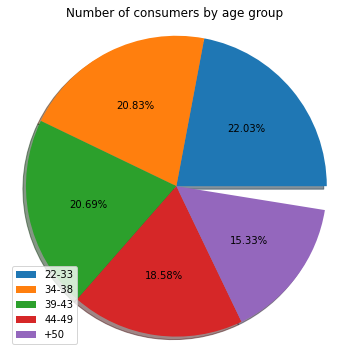

In [40]:
# Data to plot
labels = '22-33','34-38','39-43','44-49','+50'
# Plot
plt.figure(figsize=(6,6))
plt.pie(agegroup.status, autopct='%1.2f%%', shadow=True, startangle=0)
plt.title('Number of consumers by age group', fontsize=12) 
plt.legend(labels, loc='lower left', fontsize=10)
plt.axis('equal')
plt.show()

/Users/andy42i/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/andy42i/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


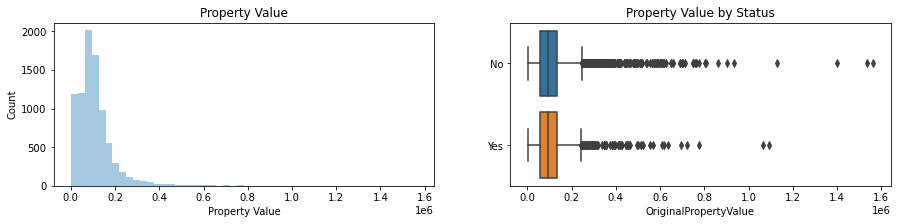

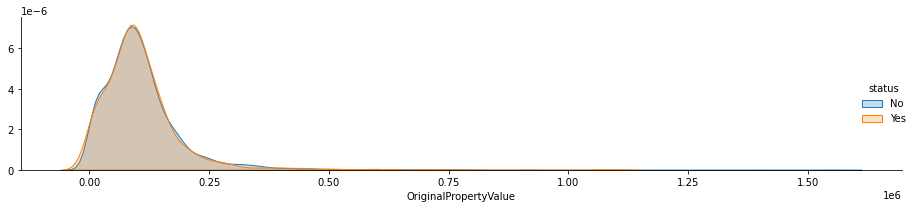

In [41]:
plot_var('OriginalPropertyValue','Property Value', continuous=True)

/Users/andy42i/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


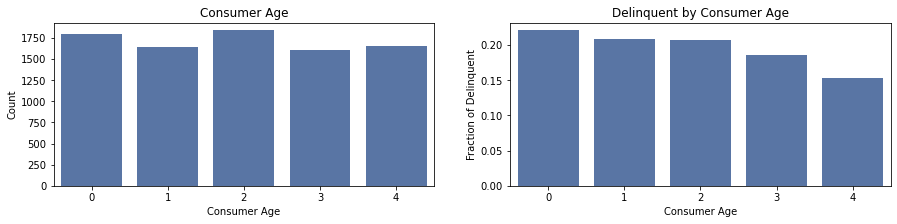

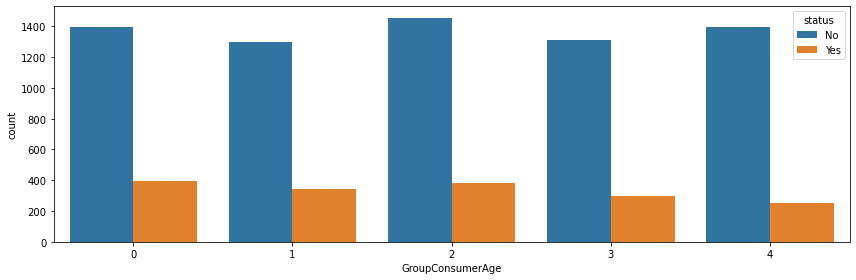

In [42]:
plot_var('GroupConsumerAge','Consumer Age', continuous=False)

/Users/andy42i/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


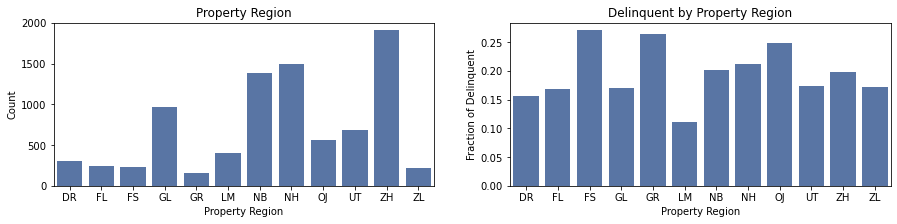

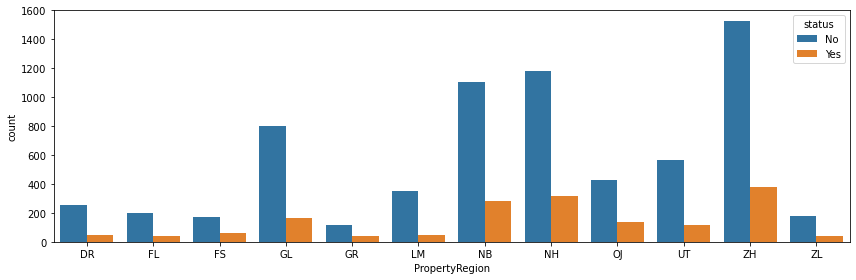

In [43]:
plot_var('PropertyRegion','Property Region', continuous=False)

/Users/andy42i/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/andy42i/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


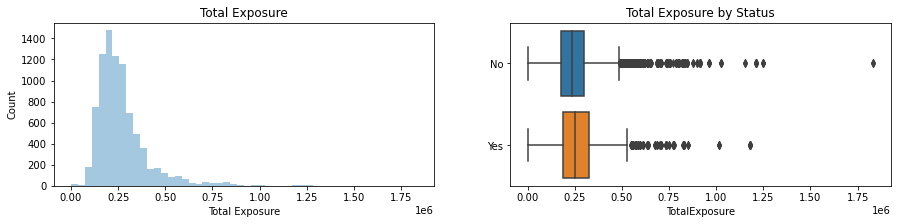

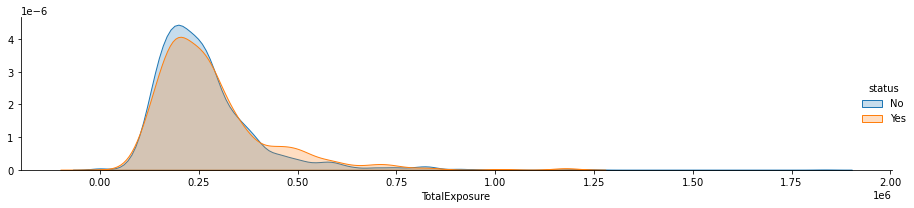

In [44]:
plot_var('TotalExposure','Total Exposure', continuous = True)

/Users/andy42i/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/andy42i/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


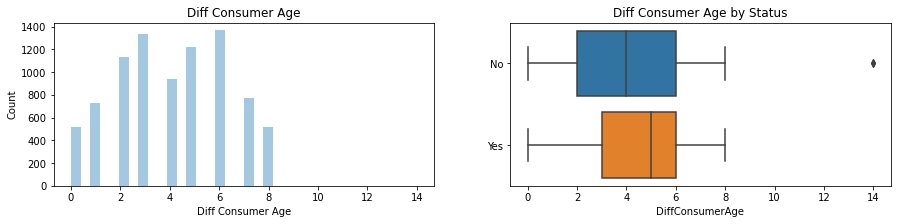

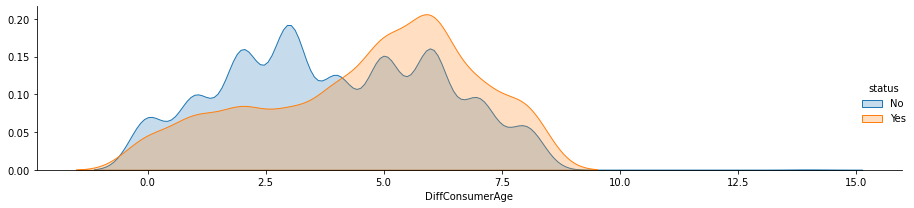

In [45]:
plot_var('DiffConsumerAge','Diff Consumer Age', continuous = True)

/Users/andy42i/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/andy42i/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


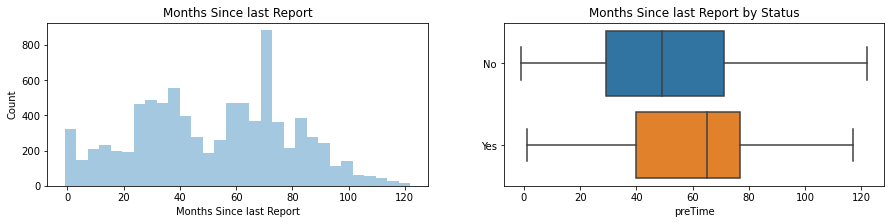

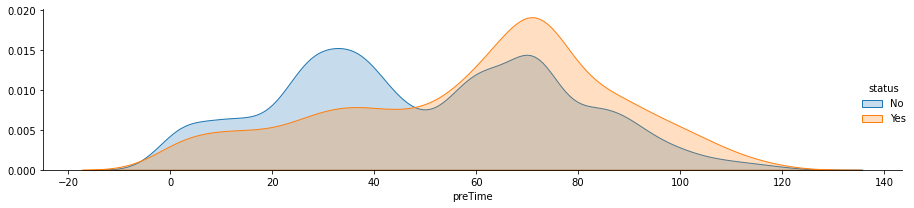

In [46]:
plot_var('preTime','Months Since last Report', continuous = True)

/Users/andy42i/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/andy42i/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


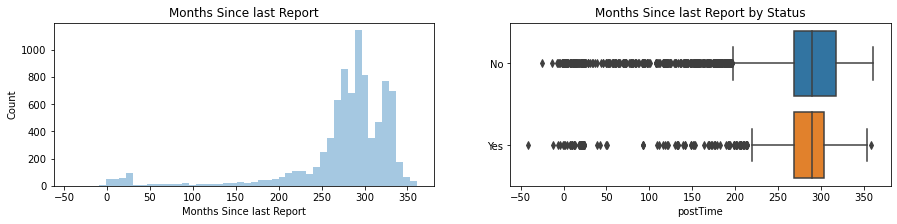

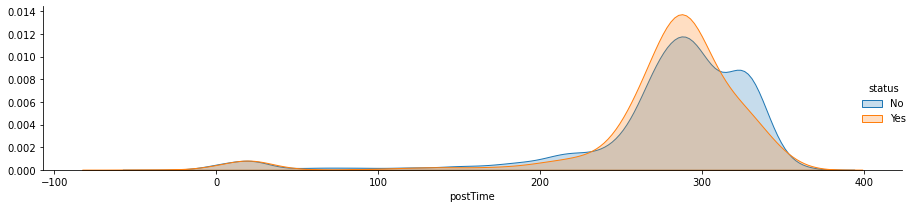

In [47]:
plot_var('postTime','Months Since last Report', continuous = True)

/Users/andy42i/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/andy42i/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


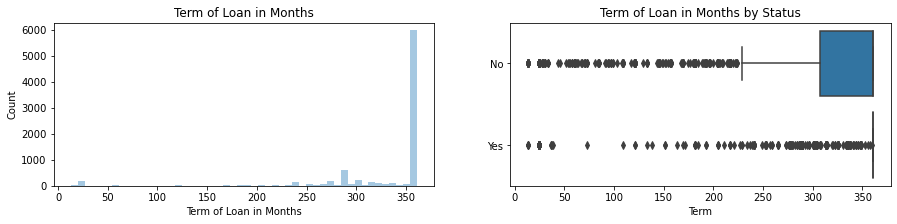

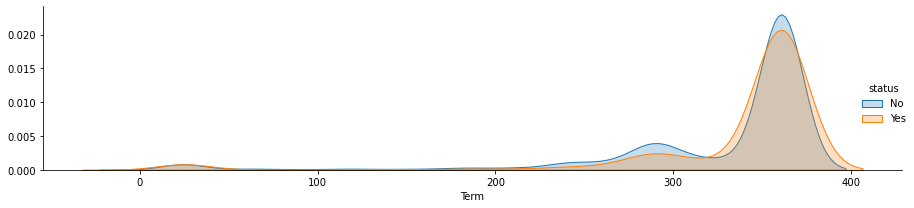

In [48]:
plot_var('Term','Term of Loan in Months', continuous = True)

/Users/andy42i/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/andy42i/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


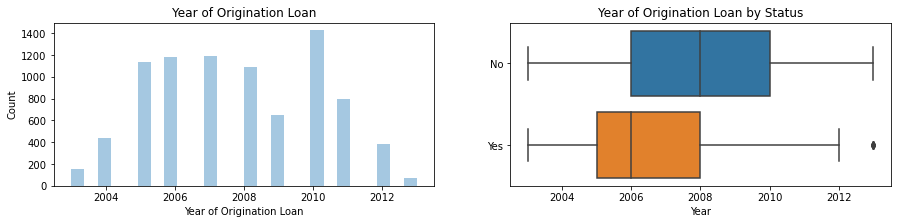

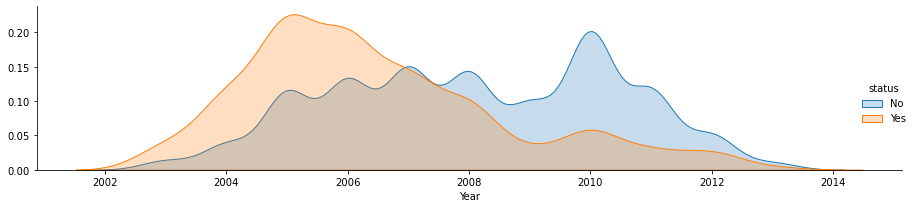

In [49]:
plot_var('Year','Year of Origination Loan', continuous = True)

/Users/andy42i/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/andy42i/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


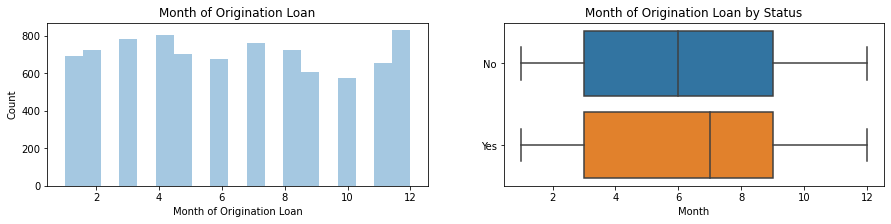

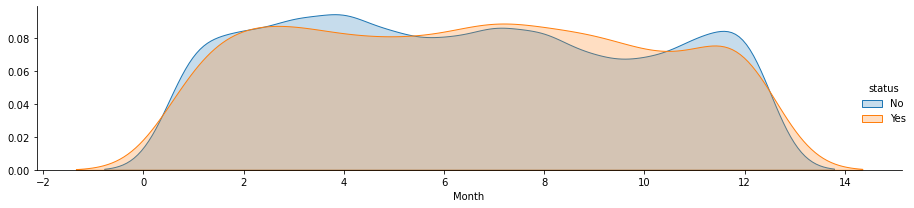

In [50]:
plot_var('Month','Month of Origination Loan', continuous = True)

/Users/andy42i/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/andy42i/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


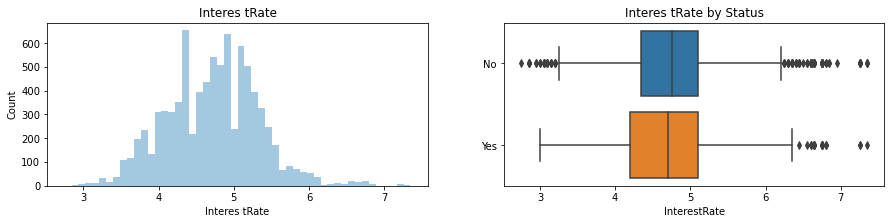

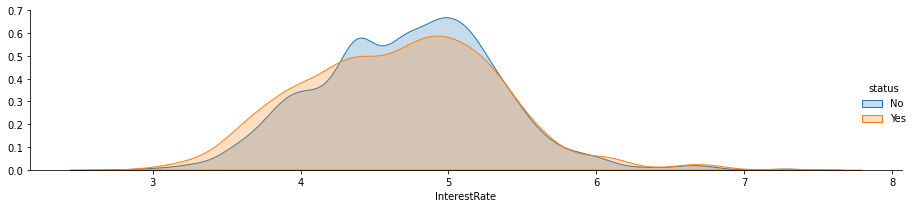

In [51]:
plot_var('InterestRate','Interes tRate', continuous = True)

### Feature Selection - Statistical Overview
I have looked at the features individually. Now I will do some overall statistical tests for all the features on their distributions, correlations, etc.

## Convert target variable to 0/1 indicator

In [52]:
df_agg['Delinquent'] = df_agg['ArrearsBalance'].apply(lambda x: 1 if x > 0 else 0)
df_agg = df_agg.drop(['status'], axis = 1)

In [53]:
df_agg.columns

Index(['DebtID', 'ConsumerID', 'PropertyRegion', 'MaturityDate',
       'LoanOriginationDate', 'StartConsumerAge', 'CurrentConsumerAge',
       'InterestRate', 'NumberMonthsInArrears', 'CurrentBalance',
       'EstDisposableIncome', 'ArrearsBalance', 'TotalExposure',
       'OriginalBalance', 'OriginalPropertyValue', 'ForeclosureValue',
       'ReportDate', 'Term', 'preTime', 'postTime', 'Year', 'Month',
       'GroupConsumerAge', 'DiffConsumerAge', 'Delinquent'],
      dtype='object')

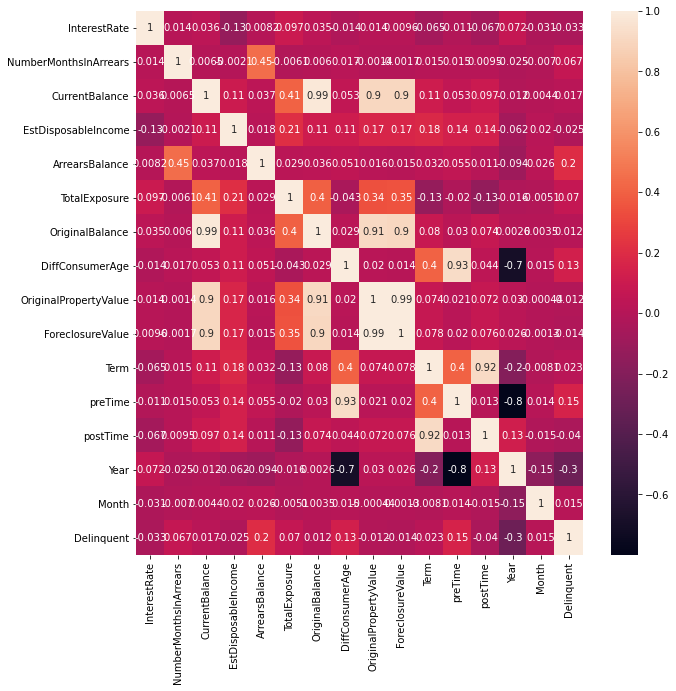

In [54]:
corrcol = ['InterestRate','NumberMonthsInArrears','CurrentBalance','EstDisposableIncome',
          'ArrearsBalance','TotalExposure','OriginalBalance','DiffConsumerAge',
          'OriginalPropertyValue','ForeclosureValue','Term','preTime','postTime','Year', 'Month','Delinquent']

cbcorr = df_agg[corrcol]

#cbcorr = cbcorr[cbcorr['EstDisposableIncome'] != ''] 
#cbcorr = cbcorr[cbcorr['PropertyIndexFactor'] != ''] 
#cbcorr = cbcorr[cbcorr['ForeclosureValue'] != ''] 

correlation = cbcorr[corrcol].corr(method='pearson')
fig, axes = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, annot = True)
plt.show()
plt.close()

The linearly correlated features are:

"CurrentBalance" vs "OriginalBalance" (0.99)
"CurrentBalance"* vs "OriginalPropertyValue" (0.9)
"CurrentBalance"* vs "ForecloasureValue" (0.91)
"CurrentBalance"* vs "TotalExposure" (0.40)
"NumberMonthsInArrears"* vs "ArrearsBalance" (0.45)
"OriginalBalance"* vs "OriginalPropertyValue" (0.91)
"OriginalBalance"* vs "ForecloasureValue" (0.91)
"TotalExposure"* vs "OriginalBalance" (0.4)

(*) with null values

Dependence of Delinquent on the predictors: None 

In [55]:
cor = df_agg[corrcol].corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.1) | (cor < -0.1)]

EstDisposableIncome    InterestRate            -0.129228
                       CurrentBalance           0.106885
ArrearsBalance         NumberMonthsInArrears    0.448866
TotalExposure          CurrentBalance           0.405894
                       EstDisposableIncome      0.208574
OriginalBalance        CurrentBalance           0.985078
                       EstDisposableIncome      0.108175
                       TotalExposure            0.402420
DiffConsumerAge        EstDisposableIncome      0.112142
OriginalPropertyValue  CurrentBalance           0.903570
                       EstDisposableIncome      0.169554
                       TotalExposure            0.343332
                       OriginalBalance          0.910287
ForeclosureValue       CurrentBalance           0.904817
                       EstDisposableIncome      0.167931
                       TotalExposure            0.350202
                       OriginalBalance          0.903726
                       Original

In [56]:
df_agg[corrcol].isnull().any()

InterestRate             False
NumberMonthsInArrears    False
CurrentBalance           False
EstDisposableIncome       True
ArrearsBalance           False
TotalExposure            False
OriginalBalance          False
DiffConsumerAge          False
OriginalPropertyValue    False
ForeclosureValue          True
Term                     False
preTime                  False
postTime                 False
Year                     False
Month                    False
Delinquent               False
dtype: bool

In [57]:
linear_corr = pd.DataFrame()
# Pearson coefficients
for col in df_agg[corrcol].columns:
    linear_corr.loc[col, 'pearson_corr'] = df_agg[col].corr(df_agg['Delinquent'])
linear_corr['abs_pearson_corr'] = abs(linear_corr['pearson_corr'])

In [58]:
linear_corr.sort_values('abs_pearson_corr', ascending=False, inplace=True)
linear_corr.drop('abs_pearson_corr', axis=1, inplace=True)
linear_corr.drop('Delinquent', axis=0, inplace=True)

In [59]:
linear_corr.reset_index(inplace=True)
linear_corr

,index,pearson_corr
0,Year,-0.298713
1,ArrearsBalance,0.203129
2,preTime,0.150534
3,DiffConsumerAge,0.132033
4,TotalExposure,0.069956
5,NumberMonthsInArrears,0.066507
6,postTime,-0.039682
7,InterestRate,-0.033303
8,EstDisposableIncome,-0.024990
9,Term,0.022560


We will remove Arrears Balance and Number of months in Arrears. Doesn't look like there's strong correlation between the other variables and the target variable

## Feature Engineering

In [60]:
# Define a function to visulize the features with missing values, and % of total values, & datatype
def missing_values_table(df):
     # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_type = df.dtypes
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)
        
     # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [61]:
missing_values_table(df_agg)

Your selected dataframe has 25 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values,type
EstDisposableIncome,70,0.8,float64
ForeclosureValue,69,0.8,float64


There are 2 variables with missing values (with very small percentage). They are not categorical variables.

In [62]:
dummy_list = ['PropertyRegion','GroupConsumerAge','Year','Month']
df = pd.get_dummies(df_agg, columns=dummy_list, drop_first=True)

In [63]:
df.columns

Index(['DebtID', 'ConsumerID', 'MaturityDate', 'LoanOriginationDate',
       'StartConsumerAge', 'CurrentConsumerAge', 'InterestRate',
       'NumberMonthsInArrears', 'CurrentBalance', 'EstDisposableIncome',
       'ArrearsBalance', 'TotalExposure', 'OriginalBalance',
       'OriginalPropertyValue', 'ForeclosureValue', 'ReportDate', 'Term',
       'preTime', 'postTime', 'DiffConsumerAge', 'Delinquent',
       'PropertyRegion_FL', 'PropertyRegion_FS', 'PropertyRegion_GL',
       'PropertyRegion_GR', 'PropertyRegion_LM', 'PropertyRegion_NB',
       'PropertyRegion_NH', 'PropertyRegion_OJ', 'PropertyRegion_UT',
       'PropertyRegion_ZH', 'PropertyRegion_ZL', 'GroupConsumerAge_1',
       'GroupConsumerAge_2', 'GroupConsumerAge_3', 'GroupConsumerAge_4',
       'Year_2004', 'Year_2005', 'Year_2006', 'Year_2007', 'Year_2008',
       'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Mont

I will use Loan Origination Date on earlier dates to predict the outcome of loans on later dates.

In [64]:
df['LoanOriginationDate'].describe()

/Users/andy42i/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    8531
unique                   1492
top       2011-04-01 00:00:00
freq                       55
first     2003-02-13 00:00:00
last      2013-04-01 00:00:00
Name: LoanOriginationDate, dtype: object

There are 1492 unique values. The first mortgage were issued in Feb 2003 and the last loans were issued in April 2013. The busiest month was April 2011, with 55 loans funded in that month. Let's further check the distribution of loans funded per year.

## Missing values

I will create an imputer object with the strategy set to median. I then train this object on the training data and use it to fill in the missing values in both the training and testing data. This means that missing values in the test data are filled in with the corresponding median value from the training data. We do it this way to avoid the problem of test data leakage.

In [65]:
X_all = df.drop(['DebtID', 'ConsumerID', 'MaturityDate', 'LoanOriginationDate',
       'StartConsumerAge', 'CurrentConsumerAge','NumberMonthsInArrears','ArrearsBalance', 'CurrentBalance','OriginalBalance',
        'ReportDate','Delinquent'], axis=1)
Y_all = df.loc[:, 'Delinquent']

In [66]:
from sklearn.preprocessing import Imputer, StandardScaler

imputer = Imputer(strategy='median')

# Train on the training features
imputer.fit(X_all)

# Transform both training and testing data
X_all = pd.DataFrame(imputer.transform(X_all), columns=X_all.columns)
#X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
#X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

/Users/andy42i/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## Feature Scaling

In [67]:
scaler = StandardScaler()

# Train on the training features
scaler.fit(X_all)

# Transform both training and testing data
X_all = pd.DataFrame(scaler.transform(X_all), columns=X_all.columns)

As features are measured in different units, they cover different ranges. Some ML models, such as SVM, KNN that consider distance measures between observations are therefore significantly affected by the range of the features and scaling allows them to learn. While some methods, such as Linear Regression and Ransom Forest do not actually require feature scaling, it's still best practice to take this step when we are comparing multiple algorithms.

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, random_state=0)

In [69]:
missing_values_table(X_train)

Your selected dataframe has 45 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,type


In [70]:
missing_values_table(X_test)

Your selected dataframe has 45 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,type


## Logistic Regression with SGD

logistic regression with stochastic gradient descent training

In [71]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

In [72]:
pipeline_sgdlr = Pipeline([
    ('model', SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=0, warm_start=False))
])

param_grid_sgdlr  = {
    'model__alpha': [10**-5, 10**-3, 10**-1,10**1 ,10**2],
    'model__penalty': ['l1', 'l2']
}

In [73]:
grid_sgdlr = GridSearchCV(estimator=pipeline_sgdlr, param_grid=param_grid_sgdlr, scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', cv=3, verbose=1, return_train_score=False)

In [74]:
grid_sgdlr.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('model', SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'model__alpha': [1e-05, 0.001, 0.1, 10, 100], 'model__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='roc_auc', verbose=1)

In [75]:
sgdlr_estimator = grid_sgdlr.best_estimator_
print('Best score: ', grid_sgdlr.best_score_)
print('Best parameters set: \n', grid_sgdlr.best_params_)

Best score:  0.7301027704379354
Best parameters set: 
 {'model__alpha': 0.001, 'model__penalty': 'l1'}


In [76]:
y_pred_sgdlr = sgdlr_estimator.predict(X_test)
y_prob_sgdlr = sgdlr_estimator.predict_proba(X_test)[:,1]

In [77]:
y_train_pred_sgdlr = sgdlr_estimator.predict(X_train)
y_train_prob_sgdlr = sgdlr_estimator.predict_proba(X_train)[:,1]

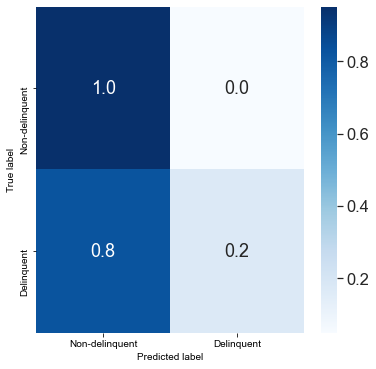

In [78]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

class_names = np.unique(y_test)
target_names = pd.Series(class_names).map({0.: 'Non-delinquent',1.:'Delinquent'})

cm = confusion_matrix(y_test, y_pred_sgdlr)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale = 1.5)
sns.heatmap(cmn, annot=True, fmt='.1f', xticklabels=target_names, yticklabels=target_names,cmap="Blues")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show(block=False)

## Feature Coefficients in the Logistic Regress Model

In [79]:
LRmodel_l2 = SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=0, warm_start=False, alpha=0.001, penalty='l1')

In [80]:
LRmodel_l2.fit(X_train, y_train)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=0, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [81]:
temp = sorted(zip(np.round(LRmodel_l2.coef_.reshape(-1),3), X_train.columns.values), key=lambda x: -abs(x[0]))
weight = [x for x, _ in temp]
feature = [x for _, x in temp]

In [82]:
print("Logistic Regression (L2) Coefficients: Top 10")
coef_pd = pd.DataFrame({'weight': weight}, index = feature)
coef_pd.head(15)

Logistic Regression (L2) Coefficients: Top 10


,weight
Year_2010,-1.029
Year_2011,-0.906
Year_2009,-0.672
Year_2008,-0.637
Year_2012,-0.559
preTime,-0.548
Year_2007,-0.357
Year_2013,-0.320
DiffConsumerAge,0.258
PropertyRegion_OJ,0.190


In [83]:
coef_pd['odds'] = coef_pd['weight'].apply(lambda x: np.exp(x))
coef_pd['percent change'] =  coef_pd['odds'].apply(lambda x: x - 1)
coef_pd.head(15)

,weight,odds,percent change
Year_2010,-1.029,0.357364,-0.642636
Year_2011,-0.906,0.404138,-0.595862
Year_2009,-0.672,0.510686,-0.489314
Year_2008,-0.637,0.528877,-0.471123
Year_2012,-0.559,0.571781,-0.428219
preTime,-0.548,0.578105,-0.421895
Year_2007,-0.357,0.699772,-0.300228
Year_2013,-0.320,0.726149,-0.273851
DiffConsumerAge,0.258,1.294339,0.294339
PropertyRegion_OJ,0.190,1.209250,0.209250


In [84]:
from sklearn.metrics import classification_report
predictions = LRmodel_l2.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1638
           1       0.52      0.17      0.26       495

   micro avg       0.77      0.77      0.77      2133
   macro avg       0.66      0.56      0.56      2133
weighted avg       0.73      0.77      0.72      2133



## Let's try with H2O

In [85]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 day 11 hours 0 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.1
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_andy42i_kp9k6v
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.565 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [86]:
df_final = df.drop(['DebtID', 'ConsumerID', 'MaturityDate', 'LoanOriginationDate',
       'StartConsumerAge', 'CurrentConsumerAge','NumberMonthsInArrears','ArrearsBalance',
        'ReportDate'], axis=1)
df_final = df_final.fillna(0)
df_final.columns

Index(['InterestRate', 'CurrentBalance', 'EstDisposableIncome',
       'TotalExposure', 'OriginalBalance', 'OriginalPropertyValue',
       'ForeclosureValue', 'Term', 'preTime', 'postTime', 'DiffConsumerAge',
       'Delinquent', 'PropertyRegion_FL', 'PropertyRegion_FS',
       'PropertyRegion_GL', 'PropertyRegion_GR', 'PropertyRegion_LM',
       'PropertyRegion_NB', 'PropertyRegion_NH', 'PropertyRegion_OJ',
       'PropertyRegion_UT', 'PropertyRegion_ZH', 'PropertyRegion_ZL',
       'GroupConsumerAge_1', 'GroupConsumerAge_2', 'GroupConsumerAge_3',
       'GroupConsumerAge_4', 'Year_2004', 'Year_2005', 'Year_2006',
       'Year_2007', 'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011',
       'Year_2012', 'Year_2013', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11',
       'Month_12'],
      dtype='object')

In [87]:
# Create an imputer object with a median filling strategy
d_aux = df_final.drop(['Delinquent'],axis=1)

scaler = StandardScaler()

# Train on the training features
scaler.fit(d_aux)

# Transform both training and testing data
dffinal = pd.DataFrame(scaler.transform(d_aux), columns=d_aux.columns)
dffinal['Delinquent'] = df_final['Delinquent']

/Users/andy42i/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/andy42i/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [88]:
dataset = h2o.H2OFrame(dffinal)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [89]:
traind, testd = dataset.split_frame([0.8], seed=42)
print("train:%d test:%d" % (traind.nrows, testd.nrows))

train:6842 test:1689


In [90]:
traind.columns

['InterestRate',
 'CurrentBalance',
 'EstDisposableIncome',
 'TotalExposure',
 'OriginalBalance',
 'OriginalPropertyValue',
 'ForeclosureValue',
 'Term',
 'preTime',
 'postTime',
 'DiffConsumerAge',
 'PropertyRegion_FL',
 'PropertyRegion_FS',
 'PropertyRegion_GL',
 'PropertyRegion_GR',
 'PropertyRegion_LM',
 'PropertyRegion_NB',
 'PropertyRegion_NH',
 'PropertyRegion_OJ',
 'PropertyRegion_UT',
 'PropertyRegion_ZH',
 'PropertyRegion_ZL',
 'GroupConsumerAge_1',
 'GroupConsumerAge_2',
 'GroupConsumerAge_3',
 'GroupConsumerAge_4',
 'Year_2004',
 'Year_2005',
 'Year_2006',
 'Year_2007',
 'Year_2008',
 'Year_2009',
 'Year_2010',
 'Year_2011',
 'Year_2012',
 'Year_2013',
 'Month_2',
 'Month_3',
 'Month_4',
 'Month_5',
 'Month_6',
 'Month_7',
 'Month_8',
 'Month_9',
 'Month_10',
 'Month_11',
 'Month_12',
 'Delinquent']

In [91]:
# Identify predictors and response
x = traind.columns
y = "Delinquent"
x.remove(y)

# For binary classification, response should be a factor
traind[y] = traind[y].asfactor()
testd[y] = testd[y].asfactor()

In [92]:
aml = H2OAutoML(max_runtime_secs = 30, #change this if you are in a rush hehehe
                max_models = 25,  
                seed = 42, 
                project_name='classification_2',
                sort_metric = "AUC")

%time aml.train(x = x, y = y, training_frame = traind)

AutoML progress: |
20:42:35.169: New models will be added to existing leaderboard classification_2@@Delinquent (leaderboard frame=null) with already 9 models.

██████████████████████████████████████████████████████████████
20:43:05.459: StackedEnsemble_BestOfFamily_2_AutoML_13_20210929_204235 [StackedEnsemble best_of_family_1 (built with AUTO metalearner, using top model from each algorithm type)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.

█| (done) 100%
CPU times: user 6.35 s, sys: 669 ms, total: 7.02 s
Wall time: 32 s
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_1_AutoML_12_20210928_224912

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.08513592350846977
RMSE: 0.29178060852028836
LogLoss: 0.2886998

,,0,1,Error,Rate
0,0,4912.0,355.0,0.0674,(355.0/5267.0)
1,1,367.0,1208.0,0.233,(367.0/1575.0)
2,Total,5279.0,1563.0,0.1055,(722.0/6842.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.400169,0.769917,173.0
1,max f2,0.246477,0.818464,240.0
2,max f0point5,0.532797,0.811546,124.0
3,max accuracy,0.441721,0.897106,158.0
4,max precision,0.937254,1.000000,0.0
5,max recall,0.039411,1.000000,370.0
6,max specificity,0.937254,1.000000,0.0
7,max absolute_mcc,0.404311,0.701968,171.0
8,max min_per_class_accuracy,0.296561,0.862920,219.0
9,max mean_per_class_accuracy,0.285745,0.865031,224.0



Gains/Lift Table: Avg response rate: 23.02 %, avg score: 23.82 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010085,0.873549,4.344127,4.344127,1.000000,0.892885,1.000000,0.892885,0.043810,0.043810,334.412698,334.412698,0.043810
1,2,0.020170,0.831893,4.218210,4.281169,0.971014,0.851720,0.985507,0.872303,0.042540,0.086349,321.821026,328.116862,0.085969
2,3,0.030108,0.801750,4.344127,4.301951,1.000000,0.814651,0.990291,0.853272,0.043175,0.129524,334.412698,330.195099,0.129144
3,4,0.040047,0.776604,4.152474,4.264855,0.955882,0.790096,0.981752,0.837593,0.041270,0.170794,315.247432,326.485459,0.169844
4,5,0.050132,0.747934,4.218210,4.255471,0.971014,0.762269,0.979592,0.822441,0.042540,0.213333,321.821026,325.547133,0.212004
5,6,0.100117,0.636064,3.899553,4.077772,0.897661,0.691748,0.938686,0.757190,0.194921,0.408254,289.955259,307.777175,0.400280
6,7,0.150102,0.533201,3.543893,3.899985,0.815789,0.584390,0.897760,0.699646,0.177143,0.585397,254.389307,289.998547,0.565461
7,8,0.200088,0.442448,2.489617,3.547651,0.573099,0.486609,0.816654,0.646426,0.124444,0.709841,148.961663,254.765082,0.662186
8,9,0.300058,0.301561,1.492500,2.862934,0.343567,0.367395,0.659036,0.553461,0.149206,0.859048,49.249977,186.293415,0.726145
9,10,0.400029,0.206036,0.749425,2.334750,0.172515,0.248210,0.537450,0.477176,0.074921,0.933968,-25.057458,133.475002,0.693604




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.13225991865238737
RMSE: 0.36367556785188
LogLoss: 0.4142958295666052
Null degrees of freedom: 6841
Residual degrees of freedom: 6839
Null deviance: 7384.122281023068
Residual deviance: 5669.224131789426
AIC: 5675.224131789426
AUC: 0.8196083430524288
AUCPR: 0.5890522327057628
Gini: 0.6392166861048576

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28444297676572816: 


,,0,1,Error,Rate
0,0,4169.0,1098.0,0.2085,(1098.0/5267.0)
1,1,501.0,1074.0,0.3181,(501.0/1575.0)
2,Total,4670.0,2172.0,0.2337,(1599.0/6842.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.284443,0.573259,221.0
1,max f2,0.156370,0.696203,289.0
2,max f0point5,0.494092,0.582262,128.0
3,max accuracy,0.494092,0.813943,128.0
4,max precision,0.883676,0.931034,11.0
5,max recall,0.005989,1.000000,398.0
6,max specificity,0.976405,0.999810,0.0
7,max absolute_mcc,0.363421,0.433945,182.0
8,max min_per_class_accuracy,0.239122,0.740839,244.0
9,max mean_per_class_accuracy,0.206952,0.747218,261.0



Gains/Lift Table: Avg response rate: 23.02 %, avg score: 23.03 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010085,0.831106,3.714543,3.714543,0.855072,0.878745,0.855072,0.878745,0.037460,0.037460,271.454336,271.454336,0.035562
1,2,0.020023,0.776951,3.385864,3.551403,0.779412,0.802002,0.817518,0.840654,0.033651,0.071111,238.586368,255.140308,0.066365
2,3,0.030108,0.745507,3.336793,3.479519,0.768116,0.760375,0.800971,0.813764,0.033651,0.104762,233.679319,247.951919,0.096978
3,4,0.040047,0.704648,3.513632,3.487985,0.808824,0.722530,0.802920,0.791122,0.034921,0.139683,251.363212,248.798517,0.129430
4,5,0.050132,0.675532,3.022001,3.394245,0.695652,0.689635,0.781341,0.770706,0.030476,0.170159,202.200138,239.424499,0.155919
5,6,0.100117,0.560528,2.654744,3.025034,0.611111,0.615126,0.696350,0.693030,0.132698,0.302857,165.474427,202.503441,0.263366
6,7,0.150102,0.475034,2.337191,2.795977,0.538012,0.516290,0.643622,0.634174,0.116825,0.419683,133.719113,179.597657,0.350193
7,8,0.200088,0.407248,1.841808,2.557609,0.423977,0.439795,0.588751,0.585615,0.092063,0.511746,84.180822,155.760873,0.404854
8,9,0.300058,0.301602,1.448042,2.187933,0.333333,0.351101,0.503653,0.507482,0.144762,0.656508,44.804233,118.793342,0.463039
9,10,0.400029,0.216259,1.213053,1.944302,0.279240,0.256081,0.447570,0.444654,0.121270,0.777778,21.305300,94.430236,0.490707


In [93]:
lb = aml.leaderboard
lb.head(rows = lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_12_20210928_224912,0.819608,0.414296,0.589052,0.263282,0.363676,0.13226
GBM_1_AutoML_12_20210928_224912,0.808811,0.428902,0.569375,0.27869,0.370899,0.137566
XGBoost_1_AutoML_12_20210928_224912,0.806298,0.425726,0.566949,0.266178,0.3692,0.136308
XGBoost_3_AutoML_13_20210929_204235,0.805361,0.426713,0.564278,0.271544,0.369763,0.136725
DRF_1_AutoML_12_20210928_224912,0.778745,1.39719,0.551199,0.290081,0.379905,0.144328
GBM_5_AutoML_13_20210929_204235,0.764169,0.476237,0.478431,0.300361,0.393048,0.154487
GBM_2_AutoML_12_20210928_224912,0.746441,0.501775,0.483162,0.311444,0.4037,0.162974
GBM_4_AutoML_12_20210928_224912,0.744934,0.512418,0.460848,0.308607,0.408879,0.167182
XGBoost_2_AutoML_12_20210928_224912,0.740646,0.49093,0.486842,0.326054,0.399175,0.159341
GLM_1_AutoML_12_20210928_224912,0.738924,0.474045,0.456854,0.319089,0.391551,0.153312


In [94]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_1_AutoML_12_20210928_224912

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.08513592350846977
RMSE: 0.29178060852028836
LogLoss: 0.2886998732547922
Null degrees of freedom: 6841
Residual degrees of freedom: 6839
Null deviance: 7382.694249510323
Residual deviance: 3950.569065618576
AIC: 3956.569065618576
AUC: 0.9407221363325408
AUCPR: 0.8527020747894607
Gini: 0.8814442726650815

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4001691905348622: 


,,0,1,Error,Rate
0,0,4912.0,355.0,0.0674,(355.0/5267.0)
1,1,367.0,1208.0,0.233,(367.0/1575.0)
2,Total,5279.0,1563.0,0.1055,(722.0/6842.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.400169,0.769917,173.0
1,max f2,0.246477,0.818464,240.0
2,max f0point5,0.532797,0.811546,124.0
3,max accuracy,0.441721,0.897106,158.0
4,max precision,0.937254,1.000000,0.0
5,max recall,0.039411,1.000000,370.0
6,max specificity,0.937254,1.000000,0.0
7,max absolute_mcc,0.404311,0.701968,171.0
8,max min_per_class_accuracy,0.296561,0.862920,219.0
9,max mean_per_class_accuracy,0.285745,0.865031,224.0



Gains/Lift Table: Avg response rate: 23.02 %, avg score: 23.82 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010085,0.873549,4.344127,4.344127,1.000000,0.892885,1.000000,0.892885,0.043810,0.043810,334.412698,334.412698,0.043810
1,2,0.020170,0.831893,4.218210,4.281169,0.971014,0.851720,0.985507,0.872303,0.042540,0.086349,321.821026,328.116862,0.085969
2,3,0.030108,0.801750,4.344127,4.301951,1.000000,0.814651,0.990291,0.853272,0.043175,0.129524,334.412698,330.195099,0.129144
3,4,0.040047,0.776604,4.152474,4.264855,0.955882,0.790096,0.981752,0.837593,0.041270,0.170794,315.247432,326.485459,0.169844
4,5,0.050132,0.747934,4.218210,4.255471,0.971014,0.762269,0.979592,0.822441,0.042540,0.213333,321.821026,325.547133,0.212004
5,6,0.100117,0.636064,3.899553,4.077772,0.897661,0.691748,0.938686,0.757190,0.194921,0.408254,289.955259,307.777175,0.400280
6,7,0.150102,0.533201,3.543893,3.899985,0.815789,0.584390,0.897760,0.699646,0.177143,0.585397,254.389307,289.998547,0.565461
7,8,0.200088,0.442448,2.489617,3.547651,0.573099,0.486609,0.816654,0.646426,0.124444,0.709841,148.961663,254.765082,0.662186
8,9,0.300058,0.301561,1.492500,2.862934,0.343567,0.367395,0.659036,0.553461,0.149206,0.859048,49.249977,186.293415,0.726145
9,10,0.400029,0.206036,0.749425,2.334750,0.172515,0.248210,0.537450,0.477176,0.074921,0.933968,-25.057458,133.475002,0.693604




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.13225991865238737
RMSE: 0.36367556785188
LogLoss: 0.4142958295666052
Null degrees of freedom: 6841
Residual degrees of freedom: 6839
Null deviance: 7384.122281023068
Residual deviance: 5669.224131789426
AIC: 5675.224131789426
AUC: 0.8196083430524288
AUCPR: 0.5890522327057628
Gini: 0.6392166861048576

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28444297676572816: 


,,0,1,Error,Rate
0,0,4169.0,1098.0,0.2085,(1098.0/5267.0)
1,1,501.0,1074.0,0.3181,(501.0/1575.0)
2,Total,4670.0,2172.0,0.2337,(1599.0/6842.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.284443,0.573259,221.0
1,max f2,0.156370,0.696203,289.0
2,max f0point5,0.494092,0.582262,128.0
3,max accuracy,0.494092,0.813943,128.0
4,max precision,0.883676,0.931034,11.0
5,max recall,0.005989,1.000000,398.0
6,max specificity,0.976405,0.999810,0.0
7,max absolute_mcc,0.363421,0.433945,182.0
8,max min_per_class_accuracy,0.239122,0.740839,244.0
9,max mean_per_class_accuracy,0.206952,0.747218,261.0



Gains/Lift Table: Avg response rate: 23.02 %, avg score: 23.03 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010085,0.831106,3.714543,3.714543,0.855072,0.878745,0.855072,0.878745,0.037460,0.037460,271.454336,271.454336,0.035562
1,2,0.020023,0.776951,3.385864,3.551403,0.779412,0.802002,0.817518,0.840654,0.033651,0.071111,238.586368,255.140308,0.066365
2,3,0.030108,0.745507,3.336793,3.479519,0.768116,0.760375,0.800971,0.813764,0.033651,0.104762,233.679319,247.951919,0.096978
3,4,0.040047,0.704648,3.513632,3.487985,0.808824,0.722530,0.802920,0.791122,0.034921,0.139683,251.363212,248.798517,0.129430
4,5,0.050132,0.675532,3.022001,3.394245,0.695652,0.689635,0.781341,0.770706,0.030476,0.170159,202.200138,239.424499,0.155919
5,6,0.100117,0.560528,2.654744,3.025034,0.611111,0.615126,0.696350,0.693030,0.132698,0.302857,165.474427,202.503441,0.263366
6,7,0.150102,0.475034,2.337191,2.795977,0.538012,0.516290,0.643622,0.634174,0.116825,0.419683,133.719113,179.597657,0.350193
7,8,0.200088,0.407248,1.841808,2.557609,0.423977,0.439795,0.588751,0.585615,0.092063,0.511746,84.180822,155.760873,0.404854
8,9,0.300058,0.301602,1.448042,2.187933,0.333333,0.351101,0.503653,0.507482,0.144762,0.656508,44.804233,118.793342,0.463039
9,10,0.400029,0.216259,1.213053,1.944302,0.279240,0.256081,0.447570,0.444654,0.121270,0.777778,21.305300,94.430236,0.490707


In [95]:
aml.leader.model_performance(test_data=testd)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.1345538001817357
RMSE: 0.3668157578154675
LogLoss: 0.4193761745306434
Null degrees of freedom: 1688
Residual degrees of freedom: 1686
Null deviance: 1825.3698965853966
Residual deviance: 1416.6527175645138
AIC: 1422.6527175645138
AUC: 0.8112907364639466
AUCPR: 0.5907274558911995
Gini: 0.6225814729278931

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.275836627251667: 


,,0,1,Error,Rate
0,0,1007.0,292.0,0.2248,(292.0/1299.0)
1,1,119.0,271.0,0.3051,(119.0/390.0)
2,Total,1126.0,563.0,0.2433,(411.0/1689.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.275837,0.568730,208.0
1,max f2,0.133470,0.688202,293.0
2,max f0point5,0.544271,0.586420,92.0
3,max accuracy,0.544271,0.816459,92.0
4,max precision,0.912671,1.000000,0.0
5,max recall,0.017205,1.000000,390.0
6,max specificity,0.912671,1.000000,0.0
7,max absolute_mcc,0.355434,0.426938,170.0
8,max min_per_class_accuracy,0.247882,0.730769,224.0
9,max mean_per_class_accuracy,0.275837,0.735042,208.0



Gains/Lift Table: Avg response rate: 23.09 %, avg score: 23.44 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010065,0.841728,4.076018,4.076018,0.941176,0.875514,0.941176,0.875514,0.041026,0.041026,307.601810,307.601810,0.040256
1,2,0.020130,0.776240,3.566516,3.821267,0.823529,0.811169,0.882353,0.843341,0.035897,0.076923,256.651584,282.126697,0.073844
2,3,0.030195,0.744825,2.547511,3.396682,0.588235,0.761838,0.784314,0.816173,0.025641,0.102564,154.751131,239.668175,0.094096
3,4,0.040261,0.719548,4.076018,3.566516,0.941176,0.731214,0.823529,0.794934,0.041026,0.143590,307.601810,256.651584,0.134352
4,5,0.050326,0.690272,3.821267,3.617466,0.882353,0.705914,0.835294,0.777130,0.038462,0.182051,282.126697,261.746606,0.171274
5,6,0.100059,0.559615,2.680952,3.151980,0.619048,0.623215,0.727811,0.700628,0.133333,0.315385,168.095238,215.197997,0.279973
6,7,0.150385,0.492205,1.630407,2.642792,0.376471,0.522900,0.610236,0.641152,0.082051,0.397436,63.040724,164.279225,0.321223
7,8,0.200118,0.423004,1.907601,2.460082,0.440476,0.456489,0.568047,0.595259,0.094872,0.492308,90.760073,146.008193,0.379914
8,9,0.300178,0.304535,1.486299,2.135488,0.343195,0.355785,0.493097,0.515435,0.148718,0.641026,48.629950,113.548779,0.443181
9,10,0.400237,0.224632,1.153163,1.889907,0.266272,0.263408,0.436391,0.452428,0.115385,0.756410,15.316340,88.990669,0.463108


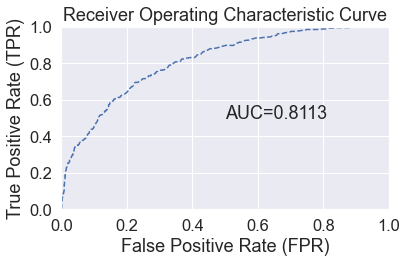

In [96]:
aml.leader.model_performance(test_data=testd).plot()

In [97]:
aml.predict(testd)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.816136,0.183864
0,0.89789,0.10211
1,0.33248,0.66752
1,0.502326,0.497674
0,0.68505,0.31495
0,0.791041,0.208959
0,0.722821,0.277179
0,0.962158,0.0378418
0,0.691438,0.308562
0,0.780771,0.219229


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_1_AutoML_12_20210928_224912,0.819608,0.414296,0.589052,0.263282,0.363676,0.13226,351,0.057619,StackedEnsemble
GBM_1_AutoML_12_20210928_224912,0.808811,0.428902,0.569375,0.27869,0.370899,0.137566,1208,0.020492,GBM
XGBoost_1_AutoML_12_20210928_224912,0.806298,0.425726,0.566949,0.266178,0.3692,0.136308,1202,0.004726,XGBoost
XGBoost_3_AutoML_13_20210929_204235,0.805361,0.426713,0.564278,0.271544,0.369763,0.136725,2990,0.005396,XGBoost
DRF_1_AutoML_12_20210928_224912,0.778745,1.39719,0.551199,0.290081,0.379905,0.144328,207,0.003815,DRF
GBM_5_AutoML_13_20210929_204235,0.764169,0.476237,0.478431,0.300361,0.393048,0.154487,1531,0.005663,GBM
GBM_2_AutoML_12_20210928_224912,0.746441,0.501775,0.483162,0.311444,0.4037,0.162974,79,0.002784,GBM
GBM_4_AutoML_12_20210928_224912,0.744934,0.512418,0.460848,0.308607,0.408879,0.167182,41,0.001985,GBM
XGBoost_2_AutoML_12_20210928_224912,0.740646,0.49093,0.486842,0.326054,0.399175,0.159341,167,0.002957,XGBoost
GLM_1_AutoML_12_20210928_224912,0.738924,0.474045,0.456854,0.319089,0.391551,0.153312,2351,0.003024,GLM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_12_20210928_224912


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.275836627251667: 


,,0,1,Error,Rate
0,0,1007.0,292.0,0.2248,(292.0/1299.0)
1,1,119.0,271.0,0.3051,(119.0/390.0)
2,Total,1126.0,563.0,0.2433,(411.0/1689.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

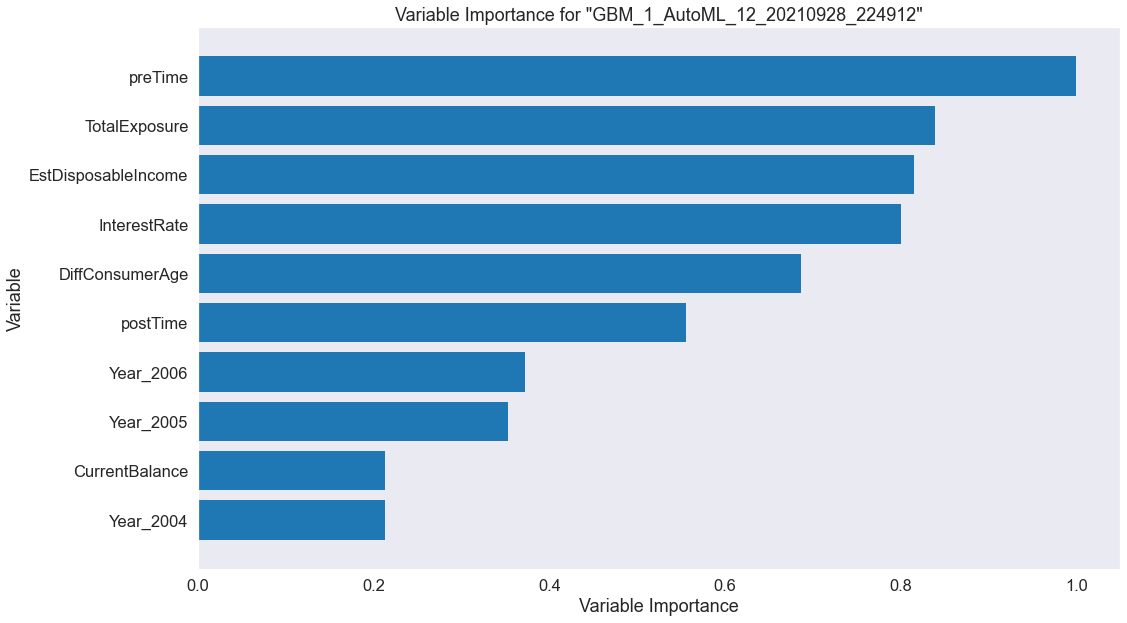

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

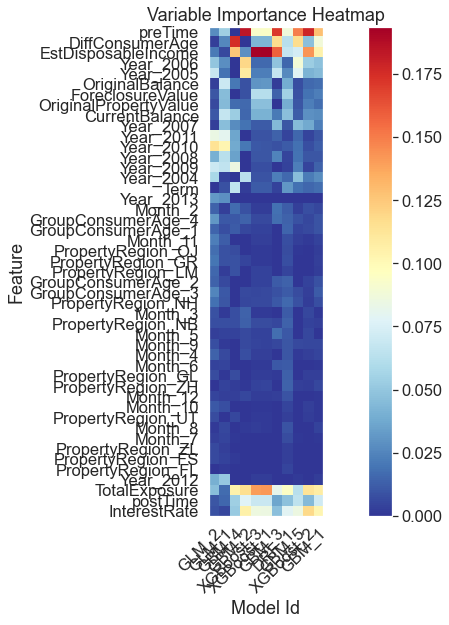

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

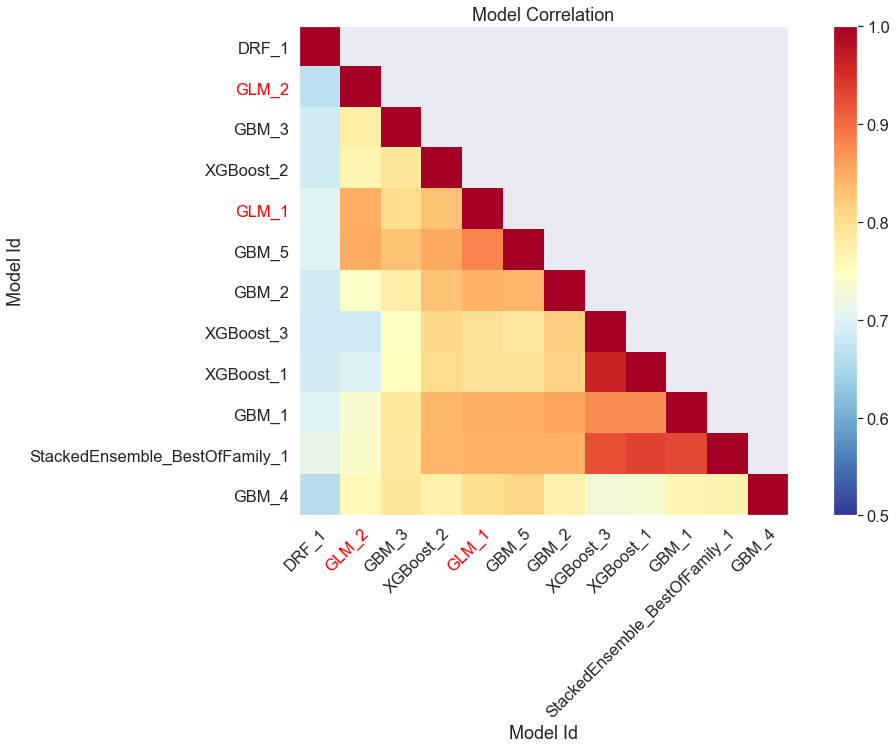

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

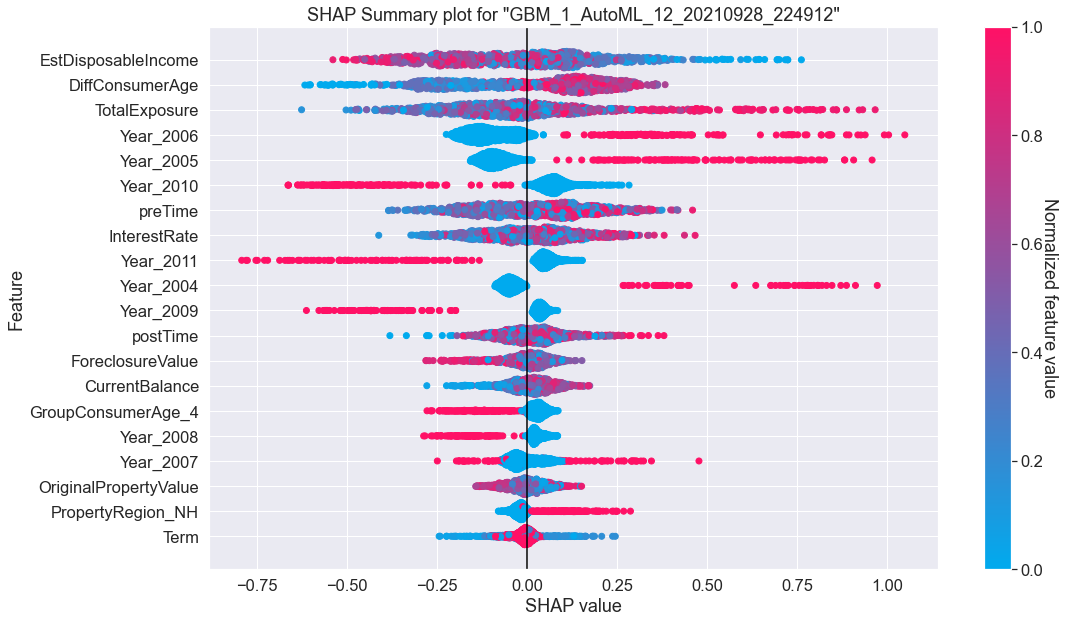

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

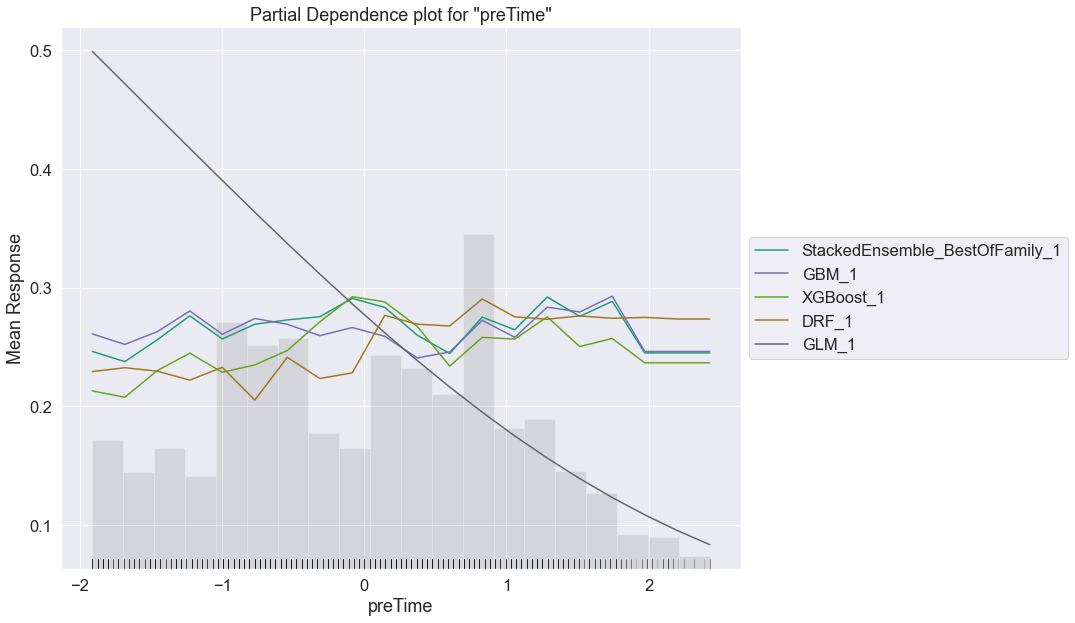

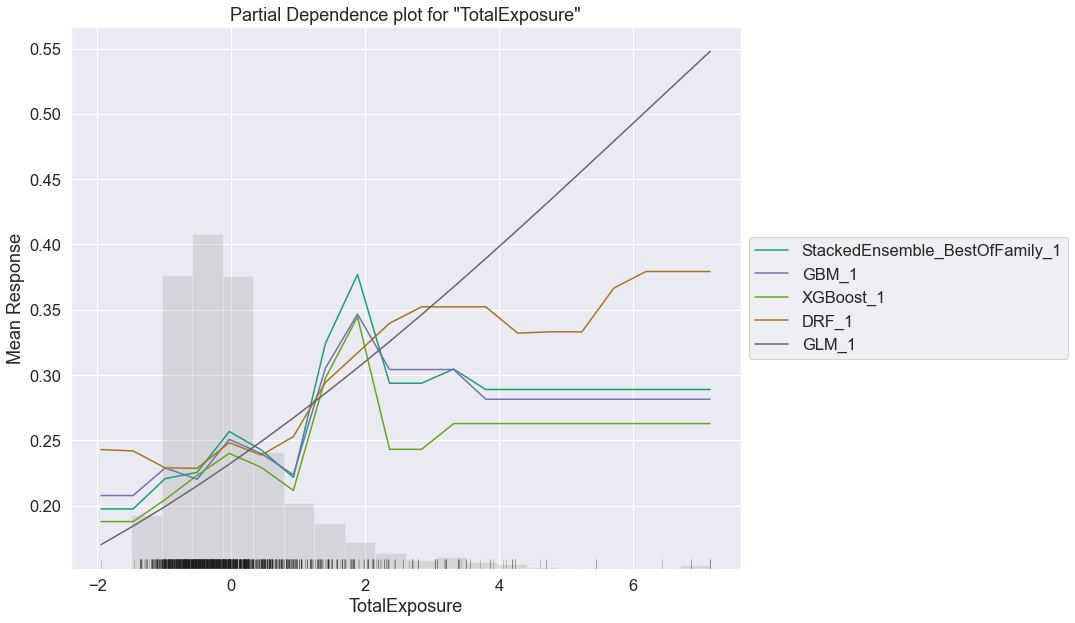

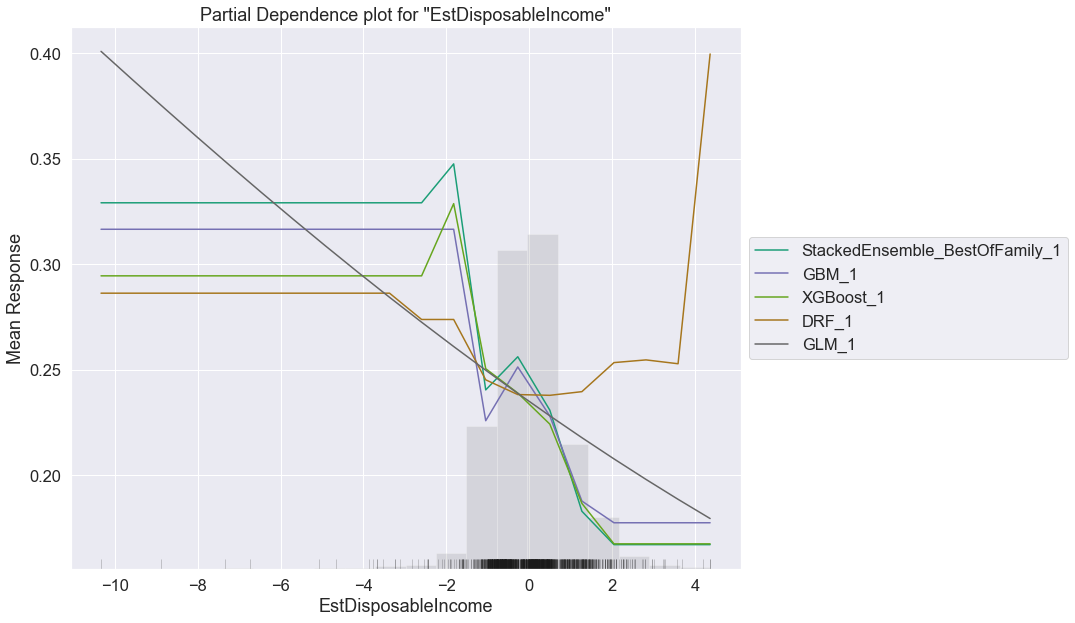

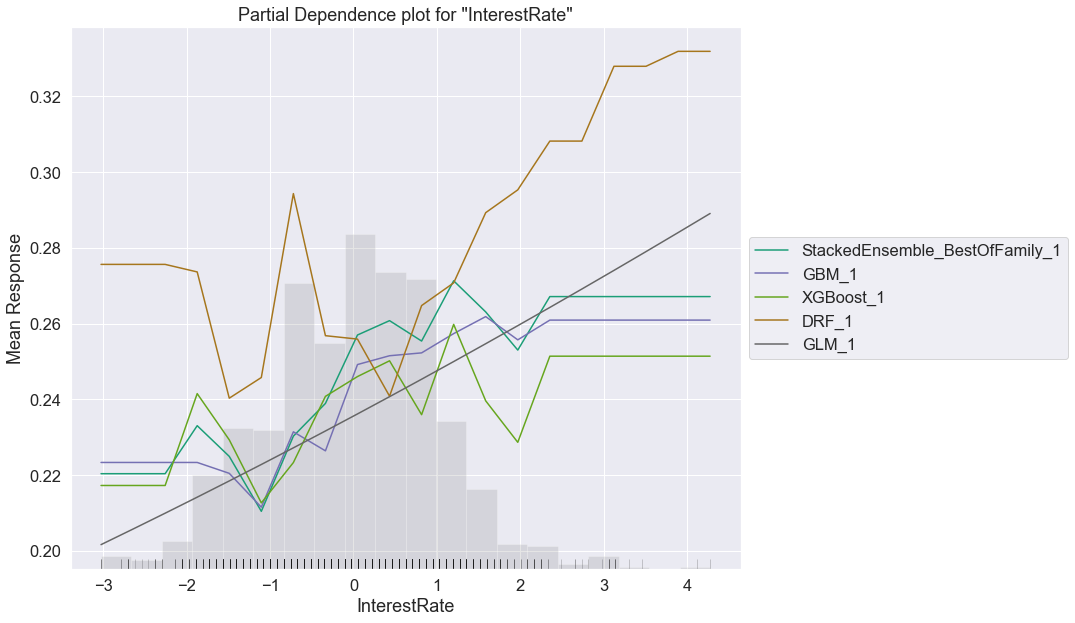

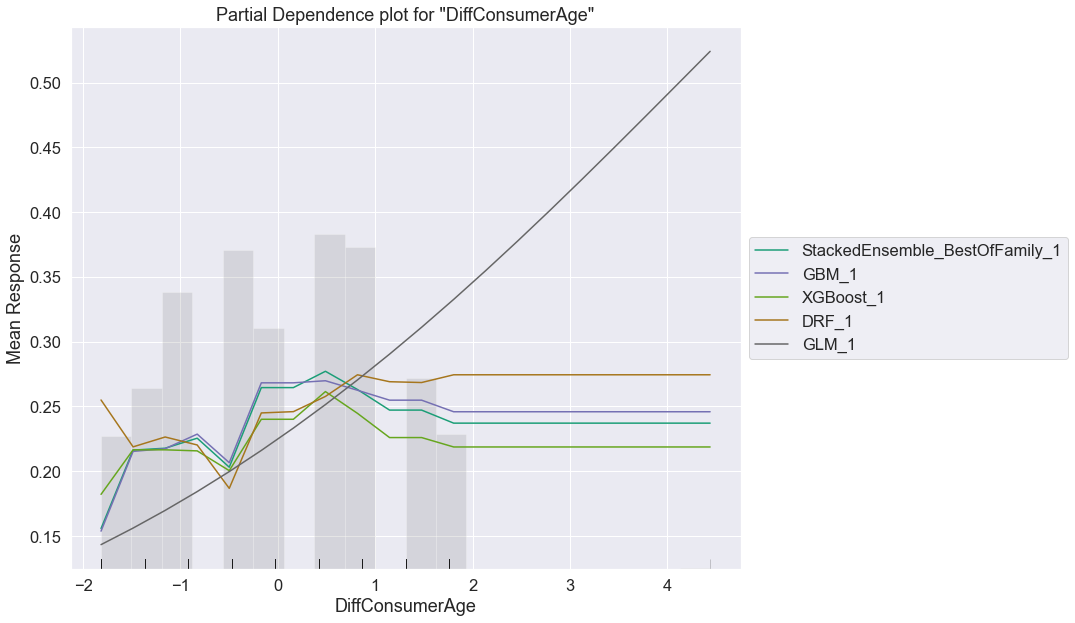

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_1_AutoML_12_20210928_224912,0.819608,0.414296,0.589052,0.263282,0.363676,0.13226,351,0.057619,StackedEnsemble
GBM_1_AutoML_12_20210928_224912,0.808811,0.428902,0.569375,0.27869,0.370899,0.137566,1208,0.020492,GBM
XGBoost_1_AutoML_12_20210928_224912,0.806298,0.425726,0.566949,0.266178,0.3692,0.136308,1202,0.004726,XGBoost
XGBoost_3_AutoML_13_20210929_204235,0.805361,0.426713,0.564278,0.271544,0.369763,0.136725,2990,0.005396,XGBoost
DRF_1_AutoML_12_20210928_224912,0.778745,1.39719,0.551199,0.290081,0.379905,0.144328,207,0.003815,DRF
GBM_5_AutoML_13_20210929_204235,0.764169,0.476237,0.478431,0.300361,0.393048,0.154487,1531,0.005663,GBM
GBM_2_AutoML_12_20210928_224912,0.746441,0.501775,0.483162,0.311444,0.4037,0.162974,79,0.002784,GBM
GBM_4_AutoML_12_20210928_224912,0.744934,0.512418,0.460848,0.308607,0.408879,0.167182,41,0.001985,GBM
XGBoost_2_AutoML_12_20210928_224912,0.740646,0.49093,0.486842,0.326054,0.399175,0.159341,167,0.002957,XGBoost
GLM_1_AutoML_12_20210928_224912,0.738924,0.474045,0.456854,0.319089,0.391551,0.153312,2351,0.003024,GLM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_12_20210928_224912


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.275836627251667: 


,,0,1,Error,Rate
0,0,1007.0,292.0,0.2248,(292.0/1299.0)
1,1,119.0,271.0,0.3051,(119.0/390.0)
2,Total,1126.0,563.0,0.2433,(411.0/1689.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

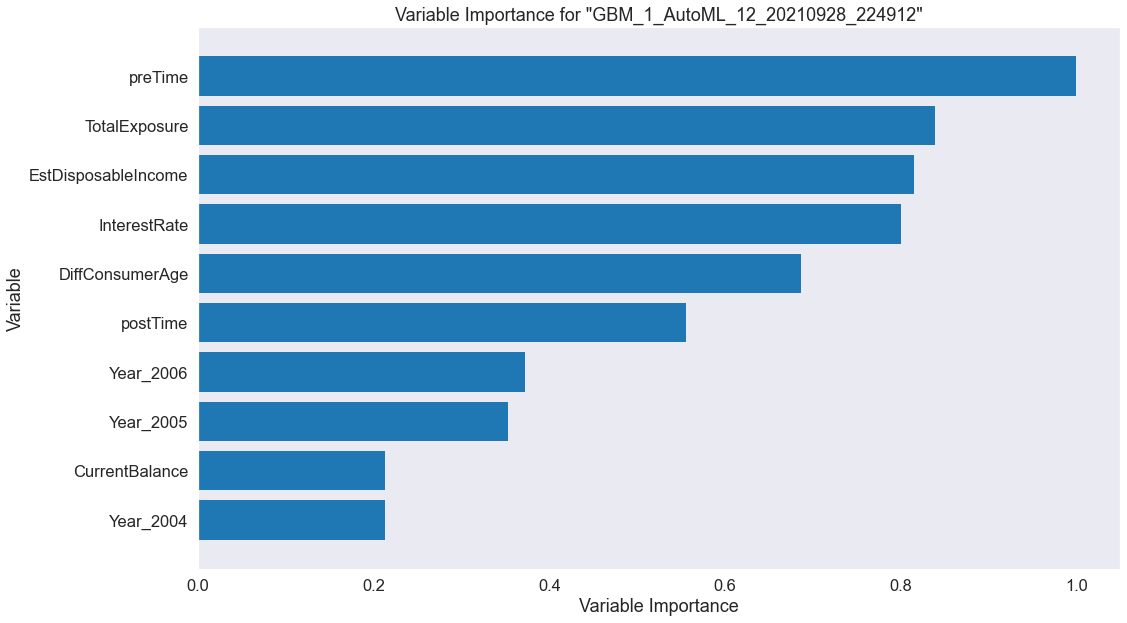

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

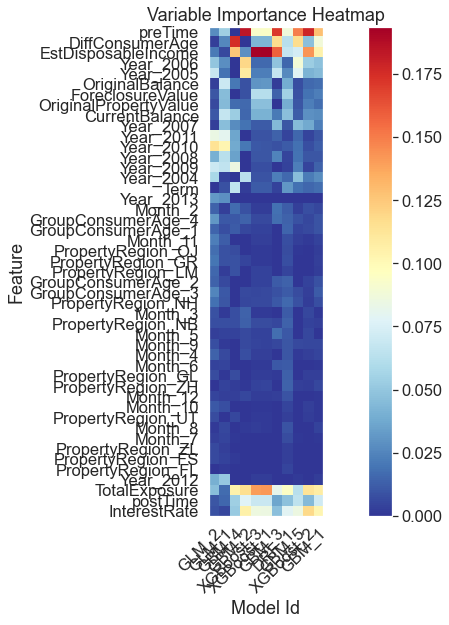

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

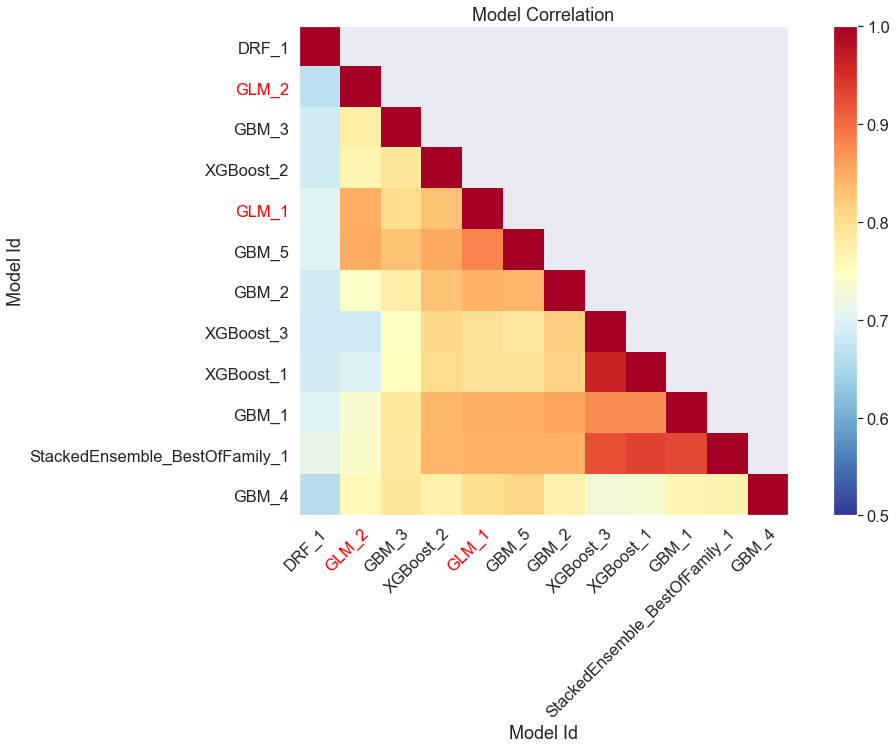

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

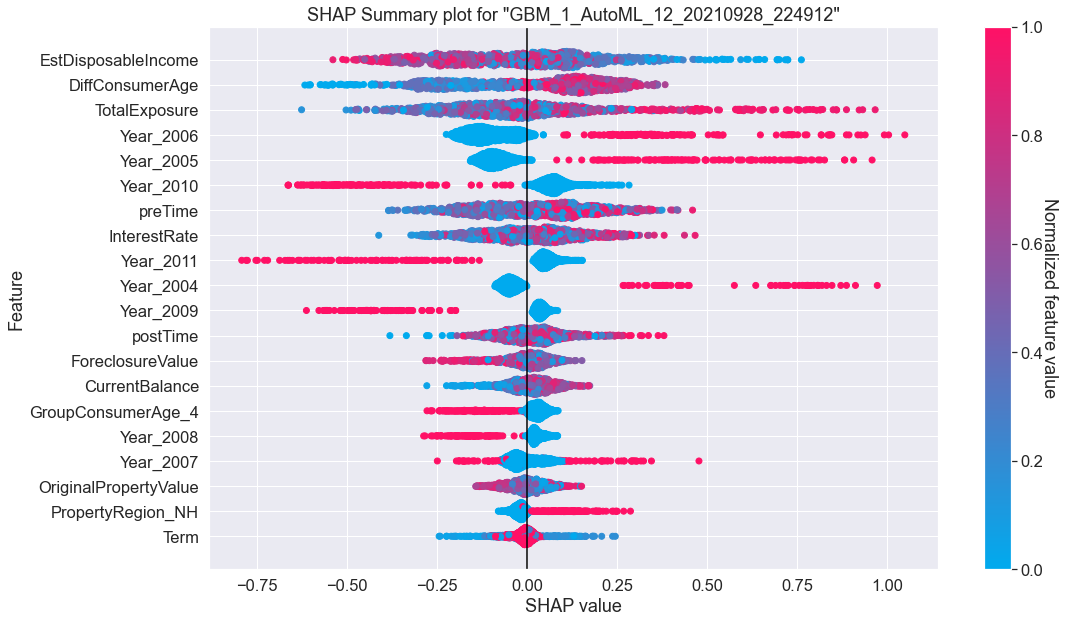

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

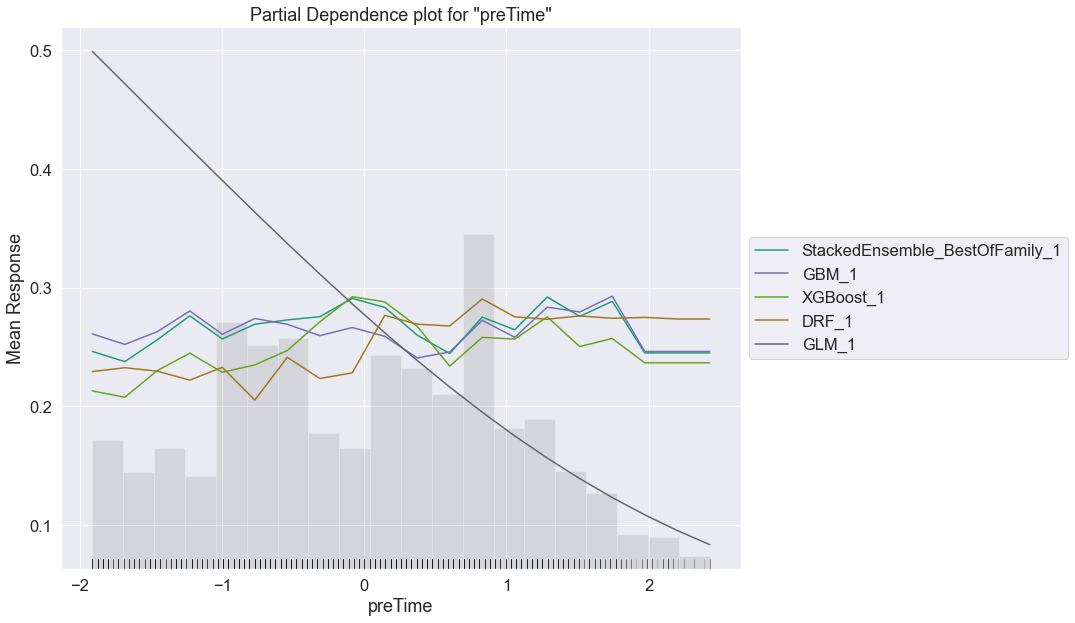

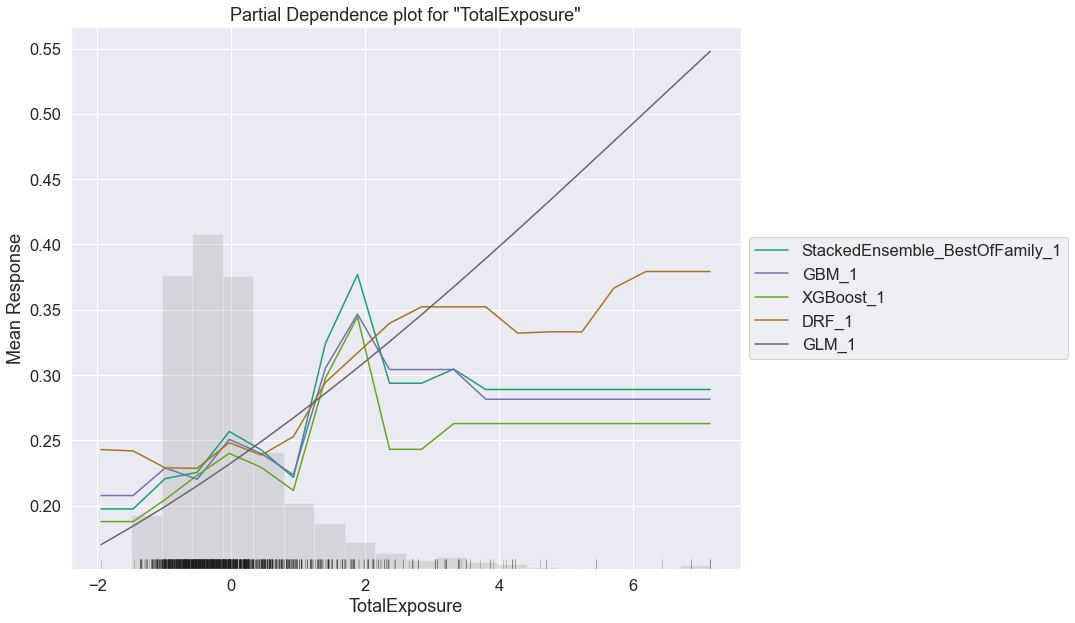

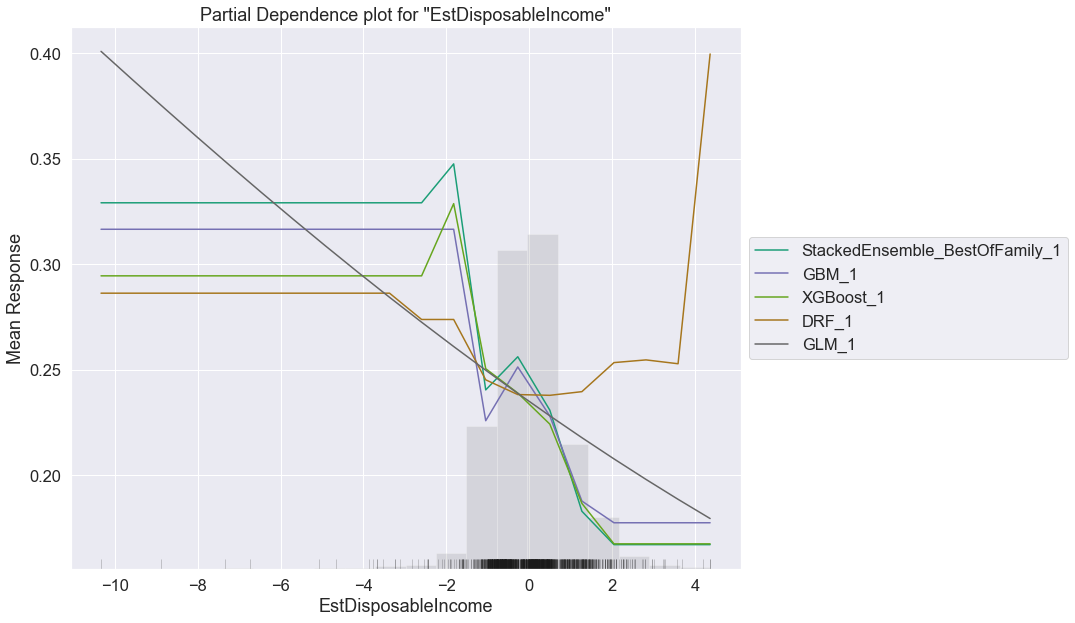

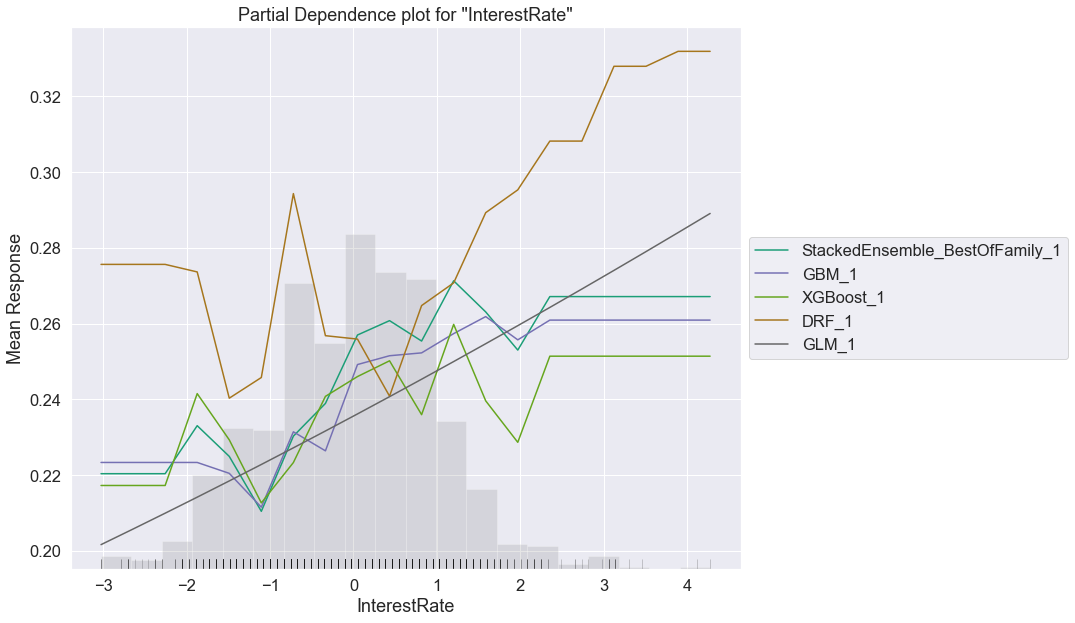

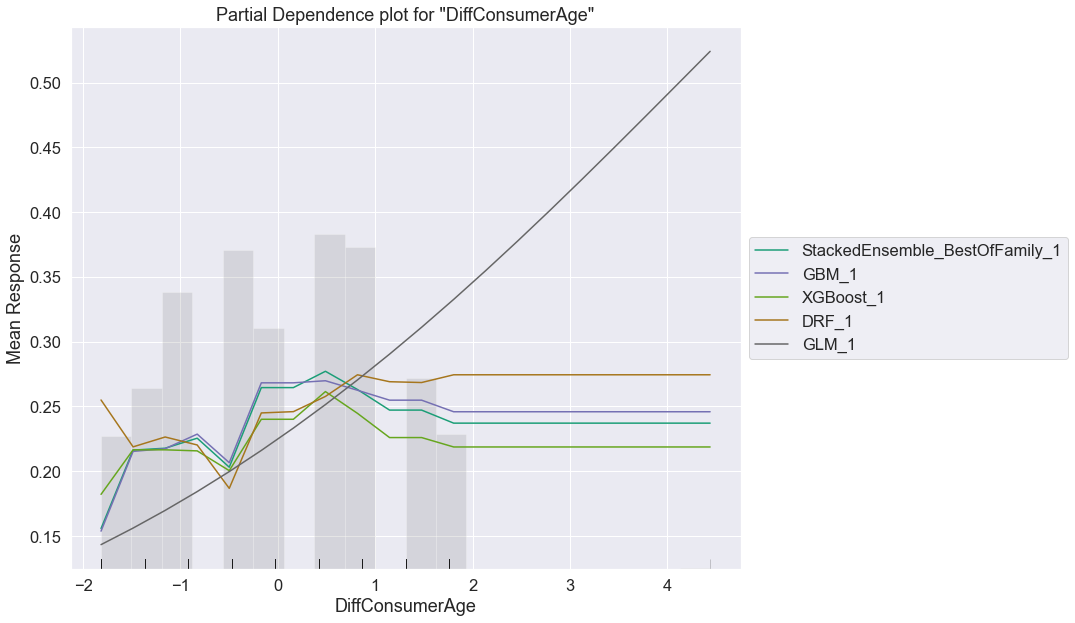

In [98]:
aml.explain(testd)

In [99]:
predleadertest = aml.predict(testd)
predleadertrain = aml.predict(traind)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [100]:
predleadertest.shape

(1689, 3)

In [101]:
predleadertrain.shape

(6842, 3)

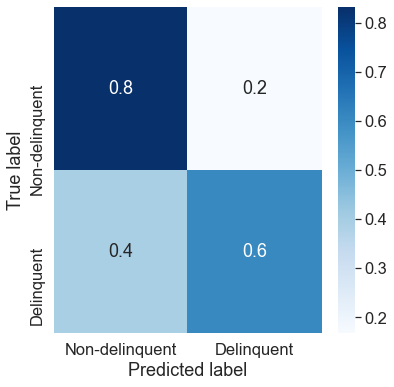

In [102]:
y_test_pred = h2o.as_list(predleadertest)
y_test_real =  h2o.as_list(testd[y])

class_names = np.unique(y_test)
target_names = pd.Series(class_names).map({0.: 'Non-delinquent',1.:'Delinquent'})

cm = confusion_matrix(y_test_real, y_test_pred.predict)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale = 1.5)
sns.heatmap(cmn, annot=True, fmt='.1f', xticklabels=target_names, yticklabels=target_names,cmap="Blues")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show(block=False)

## Consumer Characteristics 

In [103]:
data_train = h2o.as_list(traind)
data_test = h2o.as_list(testd)

In [104]:
y_train = h2o.as_list(predleadertrain)
y_test = h2o.as_list(predleadertest)

In [105]:
datatrain = pd.concat([data_train,y_train], axis = 1,  ignore_index=True)
datatest = pd.concat([data_test,y_test], axis = 1,  ignore_index=True)

datafinal = datatrain.append([datatest]).reset_index(drop=True)

In [106]:
label_df = pd.DataFrame(y_test).append(pd.DataFrame(y_train)).reset_index(drop=True)

In [107]:
label_df.head(5)

,predict,p0,p1
0,0,0.816136,0.183864
1,0,0.897890,0.102110
2,1,0.332480,0.667520
3,1,0.502326,0.497674
4,0,0.685050,0.314950


In [108]:
df_agg.columns

Index(['DebtID', 'ConsumerID', 'PropertyRegion', 'MaturityDate',
       'LoanOriginationDate', 'StartConsumerAge', 'CurrentConsumerAge',
       'InterestRate', 'NumberMonthsInArrears', 'CurrentBalance',
       'EstDisposableIncome', 'ArrearsBalance', 'TotalExposure',
       'OriginalBalance', 'OriginalPropertyValue', 'ForeclosureValue',
       'ReportDate', 'Term', 'preTime', 'postTime', 'Year', 'Month',
       'GroupConsumerAge', 'DiffConsumerAge', 'Delinquent'],
      dtype='object')

In [109]:
proba_df =  pd.concat([df_agg,label_df], axis = 1,  ignore_index=True)
proba_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2159011,352580,ZL,2038-06-01,2008-05-27,29,31,5.40,0.0,179200.0,...,47,314,2008,5,0,2,0,0,0.816136,0.183864
1,2162571,353223,NH,2038-07-01,2008-06-11,28,32,5.55,0.0,110000.0,...,46,315,2008,6,0,4,0,0,0.897890,0.102110
2,2163721,353406,GL,2038-07-01,2008-06-13,28,32,5.80,0.0,197000.0,...,46,315,2008,6,0,4,0,1,0.332480,0.667520
3,2163722,353406,GL,2038-07-01,2008-06-13,28,32,5.60,0.0,12000.0,...,46,315,2008,6,0,4,0,1,0.502326,0.497674
4,2170131,354477,GL,2038-07-01,2008-06-23,26,30,5.80,0.0,183700.0,...,46,315,2008,6,0,4,0,0,0.685050,0.314950


In [110]:
colfinal = ['DebtID', 'ConsumerID', 'PropertyRegion', 'MaturityDate',
       'LoanOriginationDate', 'StartConsumerAge', 'CurrentConsumerAge',
       'InterestRate', 'NumberMonthsInArrears', 'CurrentBalance',
       'EstDisposableIncome', 'ArrearsBalance', 'TotalExposure',
       'OriginalBalance', 'OriginalPropertyValue', 'ForeclosureValue',
       'ReportDate', 'Term', 'preTime', 'postTime', 'Year', 'Month',
       'GroupConsumerAge', 'DiffConsumerAge', 'Delinquent','predict','p0','p1']

In [111]:
proba_df.columns = colfinal
proba_df.head(5)

,DebtID,ConsumerID,PropertyRegion,MaturityDate,LoanOriginationDate,StartConsumerAge,CurrentConsumerAge,InterestRate,NumberMonthsInArrears,CurrentBalance,...,preTime,postTime,Year,Month,GroupConsumerAge,DiffConsumerAge,Delinquent,predict,p0,p1
0,2159011,352580,ZL,2038-06-01,2008-05-27,29,31,5.40,0.0,179200.0,...,47,314,2008,5,0,2,0,0,0.816136,0.183864
1,2162571,353223,NH,2038-07-01,2008-06-11,28,32,5.55,0.0,110000.0,...,46,315,2008,6,0,4,0,0,0.897890,0.102110
2,2163721,353406,GL,2038-07-01,2008-06-13,28,32,5.80,0.0,197000.0,...,46,315,2008,6,0,4,0,1,0.332480,0.667520
3,2163722,353406,GL,2038-07-01,2008-06-13,28,32,5.60,0.0,12000.0,...,46,315,2008,6,0,4,0,1,0.502326,0.497674
4,2170131,354477,GL,2038-07-01,2008-06-23,26,30,5.80,0.0,183700.0,...,46,315,2008,6,0,4,0,0,0.685050,0.314950


In [112]:
dfstd =  pd.concat([dffinal,label_df], axis = 1,  ignore_index=True)
dfstd.head(5)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,1.112502,1.050472,-0.166874,-0.064555,1.037006,1.492684,1.311714,0.46463,-0.182855,0.585849,...,-0.313406,-0.304987,-0.276772,-0.268334,-0.288143,-0.327858,0,0,0.816136,0.183864
1,1.356095,0.126530,-0.178055,-1.140833,0.112682,0.456051,0.444071,0.46463,-0.219659,0.601578,...,-0.313406,-0.304987,-0.276772,-0.268334,-0.288143,-0.327858,0,0,0.897890,0.102110
2,1.762083,1.288133,-0.322090,-0.420890,1.274766,0.742631,0.721663,0.46463,-0.219659,0.601578,...,-0.313406,-0.304987,-0.276772,-0.268334,-0.288143,-0.327858,0,1,0.332480,0.667520
3,1.437292,-1.181942,-0.322090,-0.420890,-1.196332,-1.063604,-1.045714,0.46463,-0.219659,0.601578,...,-0.313406,-0.304987,-0.276772,-0.268334,-0.288143,-0.327858,0,1,0.502326,0.497674
4,1.762083,1.110555,-0.823914,-0.604875,1.097114,0.646957,0.622259,0.46463,-0.219659,0.601578,...,-0.313406,-0.304987,-0.276772,-0.268334,-0.288143,-0.327858,0,0,0.685050,0.314950


In [113]:
dfstd.columns = ['InterestRate', 'CurrentBalance', 'EstDisposableIncome',
       'TotalExposure', 'OriginalBalance', 'OriginalPropertyValue',
       'ForeclosureValue', 'Term', 'preTime', 'postTime', 'DiffConsumerAge',
       'PropertyRegion_FL', 'PropertyRegion_FS', 'PropertyRegion_GL',
       'PropertyRegion_GR', 'PropertyRegion_LM', 'PropertyRegion_NB',
       'PropertyRegion_NH', 'PropertyRegion_OJ', 'PropertyRegion_UT',
       'PropertyRegion_ZH', 'PropertyRegion_ZL', 'GroupConsumerAge_1',
       'GroupConsumerAge_2', 'GroupConsumerAge_3', 'GroupConsumerAge_4',
       'Year_2004', 'Year_2005', 'Year_2006', 'Year_2007', 'Year_2008',
       'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Delinquent','predict','p0','p1']

In [114]:
## Create Clusters

import matplotlib.pyplot as plt
import umap
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

nclusters = 4 
dfknn = dfstd.drop(['Delinquent','predict'], axis = 1)

knncluster = KMeans(n_clusters=nclusters).fit(dfknn)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(dfknn)
results = pd.DataFrame(pca_data, columns=['x', 'y'])
results['labels'] = knncluster.labels_
proba_df['labels'] = knncluster.labels_

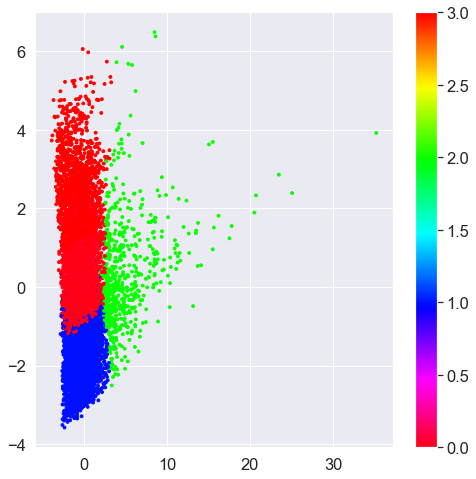

In [115]:
# Visualize clusters
fig, ax = plt.subplots(figsize=(8, 8))
#outliers = result.loc[result.labels == -1, :]
clustered = results.loc[results.labels != -1, :]
#plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=8, cmap='hsv_r')
plt.colorbar()

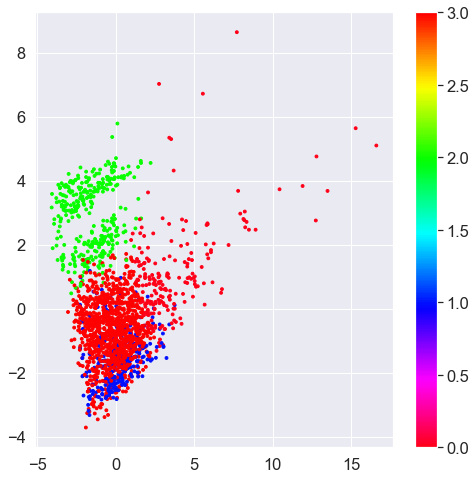

In [116]:
nclusters = 4 
dfknn = dfstd.drop(['Delinquent','predict'], axis = 1)[proba_df.p0 <= .6]

knncluster = KMeans(n_clusters=nclusters).fit(dfknn)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(dfknn)
results = pd.DataFrame(pca_data, columns=['x', 'y'])
results['labels'] = knncluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(8, 8))
#outliers = result.loc[result.labels == -1, :]
clustered = results.loc[results.labels != -1, :]
#plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=8, cmap='hsv_r')
plt.colorbar()

In [117]:
delinquent = proba_df[['ConsumerID','LoanOriginationDate','InterestRate','NumberMonthsInArrears','CurrentConsumerAge',
                     'PropertyRegion','Delinquent','predict','p0','p1','labels']][proba_df.p0 <= .4]

Text(0, 0.5, 'Number of Delinquent Consumers')

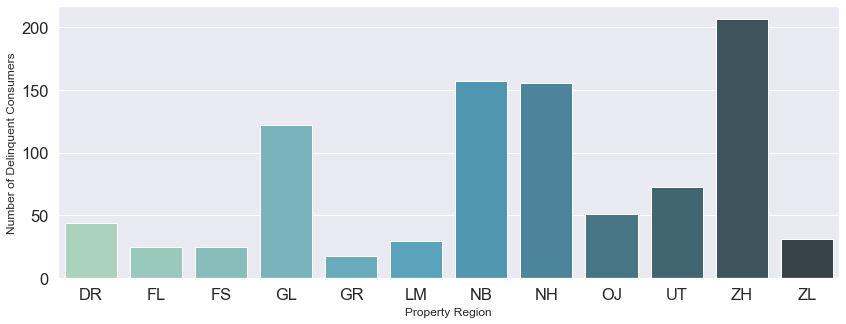

In [118]:
a = delinquent.groupby('PropertyRegion')['ConsumerID'].count().reset_index()

plt.figure(figsize=(14,5))
ax = sns.barplot(x=a['PropertyRegion'],y = a['ConsumerID'], palette = 'GnBu_d')
plt.xlabel('Property Region',fontsize = 12)
plt.ylabel('Number of Delinquent Consumers',fontsize = 12)

Text(0, 0.5, 'Number of Delinquent Consumers')

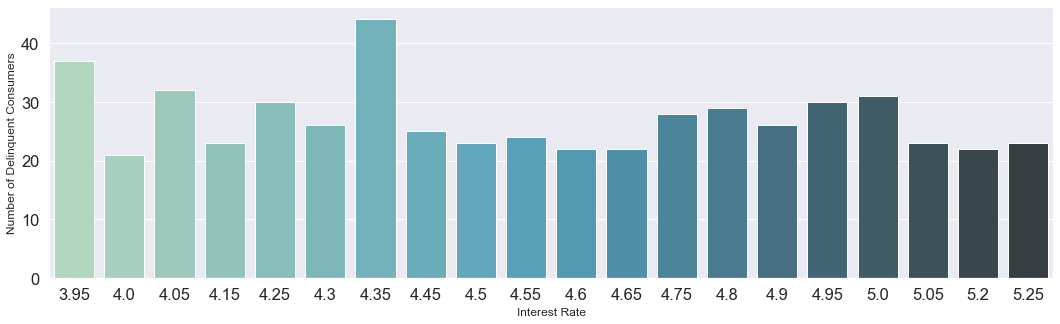

In [119]:
a = delinquent.groupby('InterestRate')['ConsumerID'].count().reset_index().sort_values(by='ConsumerID',ascending=0).head(20)

plt.figure(figsize=(18,5))
ax = sns.barplot(x=a['InterestRate'],y = a['ConsumerID'], palette = 'GnBu_d')
plt.xlabel('Interest Rate',fontsize = 12)
plt.ylabel('Number of Delinquent Consumers',fontsize = 12)